# Carga y Exploración Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Tweets.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.groupby('airline_sentiment')['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


Como primera apreciación podemos ver que el sentimiento negativo es el predominante, seguido por el sentimiento neutral y luego el positivo.

# Tratamiento de valores nulos y limpieza estructurada

In [6]:
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [7]:
data.isnull().sum()/len(data)*100

,0
tweet_id,0.000000
airline_sentiment,0.000000
airline_sentiment_confidence,0.000000
negativereason,37.308743
negativereason_confidence,28.128415
airline,0.000000
airline_sentiment_gold,99.726776
name,0.000000
negativereason_gold,99.781421
retweet_count,0.000000


Debido a la alta cantidad de valores nulos en la variable tweet_cord (93%) dropearemos tweet_cord

In [8]:
new_data = data.drop(['tweet_coord'], axis=1)

Por otro lado, debido a que airline_sentiment_gold y negative_reason_gold presentan aproximadamente un 100% de nulos, se dropearan también

In [9]:
new_data = new_data.drop(['airline_sentiment_gold', 'negativereason_gold'], axis=1)

In [10]:
len(new_data[(new_data['airline_sentiment']!='negative') & (new_data['negativereason'].isna())])

5462

Con esta query comprobamos que los valores nulos en negativereason provienen de airline_sentiment cuyo valor es diferentes a negativo, lo cual es correcto. Sin embargo, los valores nulos en negativereason corresponden a tuits con sentimiento positivo o neutral, donde no se espera que exista una razón de queja explícita. Por tanto, se mantienen como NaN sin imputación, ya que representan una ausencia legítima de información y no un dato faltante.

In [11]:
len(new_data[(new_data['airline_sentiment']!='negative') & (new_data['negativereason_confidence'].isna()==False)])

1344

In [12]:
len(new_data[(new_data['airline_sentiment']!='negative') & (new_data['negativereason_confidence'].isna())])

4118

Aqui podemos ver que hay 1344 entradas con negativereason_confidence igual a 0 cuyo sentimiento no es negativo pero hay 4118 que están calificados como  NA, es por ellos que los nulos aquí se convertiran a 0

In [13]:
new_data['negativereason_confidence'] = new_data['negativereason_confidence'].fillna(0.0)

In [14]:
new_data['negativereason_confidence'].isnull().sum()

np.int64(0)

Podemos ver que ya no hay valores nulos

In [15]:
print("\nTop 30 user_timezone:")
print(new_data['user_timezone'].value_counts(dropna=False).head(30))



Top 30 user_timezone:
user_timezone
NaN                            4820
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                        74
America/Chicago                  37
America/New_York                 26
Indiana (East)                   26
Paris                            25
Brasilia                         23
Abu Dhabi                        23
Santiago                         17
Greenland                        17
Tehran                           17
Dublin                           17
Athens                           16
Casablanca                       15
America/Los_Angeles              15
Mid-Atlantic               

La variable user_timezone contiene grandes regiones que no nos proveen información especifica de ubicación como para usarla, además tiene un 32% de nulos. Por lo tanto se dropeará

In [16]:
new_data = new_data.drop(['user_timezone'], axis=1)

In [17]:
print("Top 50 tweet_location:")
print(new_data['tweet_location'].value_counts(dropna=False).head(50))

Top 50 tweet_location:
tweet_location
NaN                            4733
Boston, MA                      157
New York, NY                    156
Washington, DC                  150
New York                        127
USA                             126
Chicago                         104
Los Angeles, CA                  96
New York City                    96
NYC                              95
San Francisco, CA                91
San Francisco                    86
Chicago, IL                      81
Brooklyn, NY                     66
Austin, TX                       64
Los Angeles                      64
Washington, D.C.                 63
Boston                           62
Dallas, TX                       54
Washington DC                    53
Nashville, TN                    45
NY                               42
Texas                            42
San Diego                        38
Philadelphia, PA                 38
Denver, CO                       37
Houston, TX               

La variable tweet_location tiene un 32% de nulos, pero también carece de una estructura fija (emojis,nombres de dipositivos) para indicar la ciudad desde donde se realizo el tweet. Además, posee nombres de ciudades, sin embargo, se repiten. Por ello, aplicaremos dos approaches para extraer la mayor cantidad de ciudades validad posibles, un geoparser, y spacy para reconocer entidades Geopoliticas

In [19]:
from geotext import GeoText
def geoparse_city(text):
    if pd.isna(text):
        return 'unknown'
    places = GeoText(text)
    if places.cities:
        return places.cities[0]  # Devuelve la primera ciudad reconocida
    return 'other'


In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_geoparse(text):
    if pd.isna(text):
        return 'unknown'
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            return ent.text
    return 'other'


In [21]:
def geo_normalize(city_name):
    if city_name == 'unknown':
        return 'unknown'
    places = GeoText(city_name)
    if places.cities:
        return places.cities[0]
    return 'other'

In [22]:
new_data['city_clean'] = new_data['tweet_location'].apply(geoparse_city)

In [23]:
new_data['city_spacy'] = new_data['tweet_location'].apply(spacy_geoparse)

In [24]:
# Ver porcentaje de "other" antes y después
geotext_other_ratio = new_data['city_clean'].value_counts(normalize=True).get('other', 0)
spacy_other_ratio = new_data['city_spacy'].value_counts(normalize=True).get('other', 0)

print(f"Reducción de 'other': {geotext_other_ratio:.2%} → {spacy_other_ratio:.2%}")


Reducción de 'other': 27.86% → 24.71%


In [25]:
print(new_data['city_clean'].value_counts().head(20))

city_clean
unknown          4733
other            4078
New York          534
Washington        330
Boston            272
Chicago           240
San Francisco     216
Los Angeles       198
Dallas            129
Brooklyn          111
Austin            111
Nashville          82
London             80
Houston            79
San Diego          78
Texas              68
Seattle            68
Denver             67
Las Vegas          59
Philadelphia       57
Name: count, dtype: int64


In [26]:
print(new_data['city_spacy'].value_counts().head(20))

city_spacy
unknown          4733
other            3617
New York          387
Washington        267
Boston            263
Chicago           231
San Francisco     199
Los Angeles       196
USA               173
Dallas            130
New York City     125
Brooklyn          112
NC                 82
Houston            79
Nashville          73
London             72
San Diego          71
Denver             71
Seattle            68
Texas              63
Name: count, dtype: int64


Aplicando el geoparsing comparado con el NER para GPE de spacy, podemos ver que spacy tuvo menos 'other', eso significa que spacy pudo extraer más ciudades.  
Sin embargo, spacy repitió algunas ciudades como New York, es por eso que para normalizar el output de spacy se le aplicará el geoparsing.

In [27]:
new_data['city_spacy_geo'] = new_data['city_spacy'].apply(geo_normalize)

In [28]:
spacy_geo_normalized_ratio = new_data['city_spacy_geo'].value_counts(normalize=True).get('other', 0)
print(f"Ratio de other final: {spacy_geo_normalized_ratio:.2%}")

Ratio de other final: 36.22%


In [29]:
print(new_data['city_spacy_geo'].value_counts().head(20))


city_spacy_geo
other            5303
unknown          4733
New York          527
Washington        330
Boston            263
Chicago           231
Los Angeles       199
San Francisco     199
Dallas            130
Brooklyn          112
Houston            79
Nashville          73
London             72
Texas              72
San Diego          71
Denver             71
Seattle            68
Philadelphia       57
Las Vegas          56
Atlanta            52
Name: count, dtype: int64


Como resultado del procesamiento de la variable tweet_location podemos ver que para la variable city_clean donde se aplicó GeoText de mnaera directa (27.86%) tiene una proporción de valores other mayor a la variable city_spacy (24.71%) , donde se aplicó reconocimiento de entidades geopoliticas. Sin embargo, city_spacy presentó valores repetidos por lo que se normalizaron sus valores con GeoText y el resultado fue de (36.22%), mucho peor. En base a este análisis, hemos decidido hacer una fusión entre los valores de city_spacy y city_clean para obtener lo mejor de ambos approaches.

In [30]:
def combine_city(row):
    if row['city_clean'] == 'other' and row['city_spacy'] not in ['other', 'unknown']:
        return row['city_spacy']
    else:
        return row['city_clean']

In [31]:
new_data['city_final'] = new_data.apply(combine_city, axis=1)

In [32]:
combined_cities_ratio = new_data['city_final'].value_counts(normalize=True).get('other', 0)
print(f"Ratio de other final: {combined_cities_ratio:.2%}")

Ratio de other final: 17.73%


In [33]:
print(new_data['city_clean'].value_counts().head(20))

city_clean
unknown          4733
other            4078
New York          534
Washington        330
Boston            272
Chicago           240
San Francisco     216
Los Angeles       198
Dallas            129
Brooklyn          111
Austin            111
Nashville          82
London             80
Houston            79
San Diego          78
Texas              68
Seattle            68
Denver             67
Las Vegas          59
Philadelphia       57
Name: count, dtype: int64


In [34]:
print(new_data['city_final'].value_counts().head(20))

city_final
unknown          4733
other            2596
New York          534
Washington        331
Boston            273
Chicago           242
San Francisco     216
Los Angeles       200
USA               159
Dallas            131
Austin            113
Brooklyn          113
Nashville          86
Houston            83
London             81
San Diego          78
Texas              73
Denver             69
Seattle            68
Las Vegas          59
Name: count, dtype: int64


In [35]:
new_data['city_final'] = new_data['city_final'].replace({'unknown':'other'})

In [36]:
new_data.drop(columns=['tweet_location','city_clean','city_spacy','city_spacy_geo'],inplace=True)

In [37]:
new_data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,0
airline,0
name,0
retweet_count,0
text,0
tweet_created,0


Ahora ya no tenemos nulos en las variables que utilizaremos en nuestras visualizaciones salvo por negativereason

In [38]:
new_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,14640.000000,14640.000000
mean,5.692184e+17,0.900169,0.458755,0.082650
std,7.791112e+14,0.162830,0.401057,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.000000,0.000000
50%,5.694779e+17,1.000000,0.624600,0.000000
75%,5.698905e+17,1.000000,0.703300,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


<Axes: ylabel='airline_sentiment_confidence'>

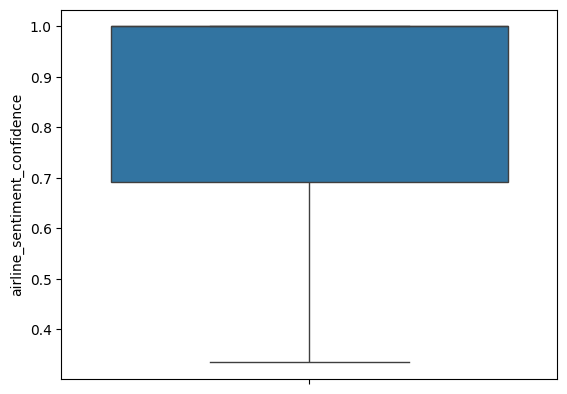

In [39]:
sns.boxplot(new_data['airline_sentiment_confidence'])

A partir de este boxplot podemos apreciar que el nivel de confianza del sentimiento expresado en el tweet se concentra en valores altos, por lo que son validos y utilizaremos en su totalidad (me dió pereza hacer más)

<Axes: ylabel='negativereason_confidence'>

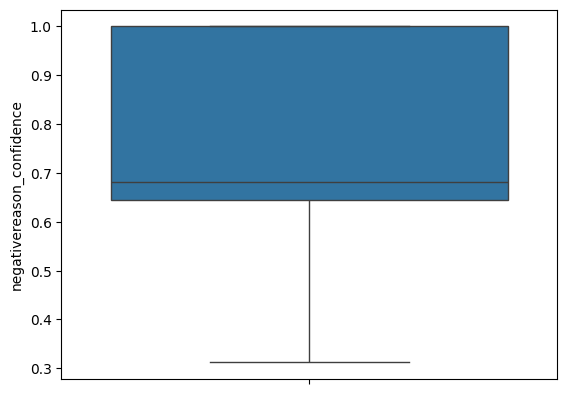

In [40]:
sns.boxplot(new_data[new_data['airline_sentiment']=='negative']['negativereason_confidence'])

A partir de este boxplot podemos apreciar que el nivel de confianza del motivo de queja por sentimiento negativo, también se concentra en valores altos. Esto nos indica que son opiniones validad y las utilizaremos en su totalidad.  

# Visualización exploratoria de variable estructuradas

## Número de tweets por aerolinea

In [41]:
ntweets_by_airline = new_data.groupby('airline')['airline'].count()
ntweets_by_airline

,airline
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


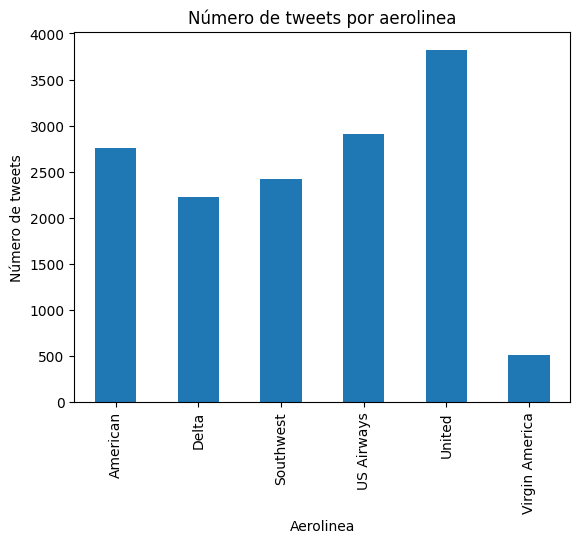

In [42]:
ntweets_by_airline.plot(kind='bar')
plt.title('Número de tweets por aerolinea')
plt.xlabel('Aerolinea')
plt.ylabel('Número de tweets')
plt.show()

## Distribución de  sentimientos por aerolinea

In [43]:
sentiments_by_airline = new_data.groupby('airline')['airline_sentiment'].value_counts()
sentiments_by_airline

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: count, dtype: int64

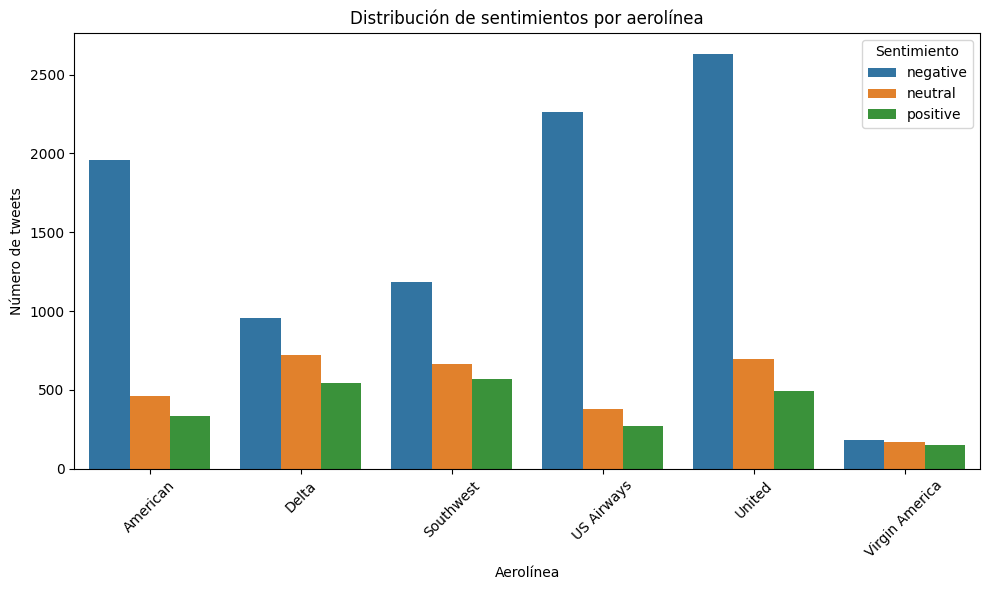

In [44]:
sentiments_by_airline = new_data.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=sentiments_by_airline, x='airline', y='count', hue='airline_sentiment')
plt.title('Distribución de sentimientos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de tweets')
plt.legend(title='Sentimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Razones del sentimiento negativo más comunes

In [45]:
frequent_negative_reasons = new_data.groupby('negativereason')['negativereason'].count().sort_values(ascending=False)
frequent_negative_reasons

,negativereason
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


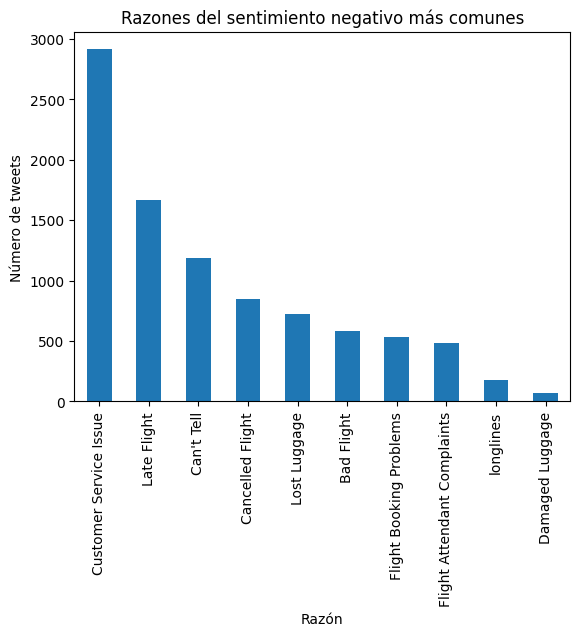

In [46]:
frequent_negative_reasons.plot(kind='bar')
plt.title('Razones del sentimiento negativo más comunes')
plt.xlabel('Razón')
plt.ylabel('Número de tweets')
plt.show()

In [156]:
new_data['negativereason'] = new_data['negativereason'].replace({
    'Damaged Luggage': 'Luggage Problems',
    'Lost Luggage': 'Luggage Problems'
})

Tras ver la distribución de la categoría de quejas, se detecto que Damaged Luggage tenía pocos valores, por lo tanto se fusionó con Lost Luggage en una clase Luggage Problems

## Razones del sentimiento negativo más comunes por aerolinea

In [157]:
frequent_negative_reasons_by_airline = new_data.groupby('airline')['negativereason'].value_counts()
frequent_negative_reasons_by_airline

airline         negativereason             
American        Customer Service Issue         768
                Late Flight                    249
                Cancelled Flight               246
                Can't Tell                     198
                Luggage Problems               161
                Flight Booking Problems        130
                Bad Flight                      87
                Flight Attendant Complaints     87
                longlines                       34
Delta           Late Flight                    269
                Customer Service Issue         199
                Can't Tell                     186
                Luggage Problems                68
                Bad Flight                      64
                Flight Attendant Complaints     60
                Cancelled Flight                51
                Flight Booking Problems         44
                longlines                       14
Southwest       Customer Service Issue         391
                Cancelled Flight               162
                Can't Tell                     159
                Late Flight                    152
                Luggage Problems               104
                Bad Flight                      90
                Flight Booking Problems         61
                Flight Attendant Complaints     38
                longlines                       29
US Airways      Customer Service Issue         811
                Late Flight                    453
                Can't Tell                     246
                Cancelled Flight               189
                Luggage Problems               165
                Flight Attendant Complaints    123
                Flight Booking Problems        122
                Bad Flight                     104
                longlines                       50
United          Customer Service Issue         681
                Late Flight                    525
                Can't Tell                     379
                Luggage Problems               291
                Bad Flight                     216
                Cancelled Flight               181
                Flight Attendant Complaints    168
                Flight Booking Problems        144
                longlines                       48
Virgin America  Customer Service Issue          60
                Flight Booking Problems         28
                Can't Tell                      22
                Bad Flight                      19
                Cancelled Flight                18
                Late Flight                     17
                Luggage Problems                 9
                Flight Attendant Complaints      5
                longlines                        3
Name: count, dtype: int64

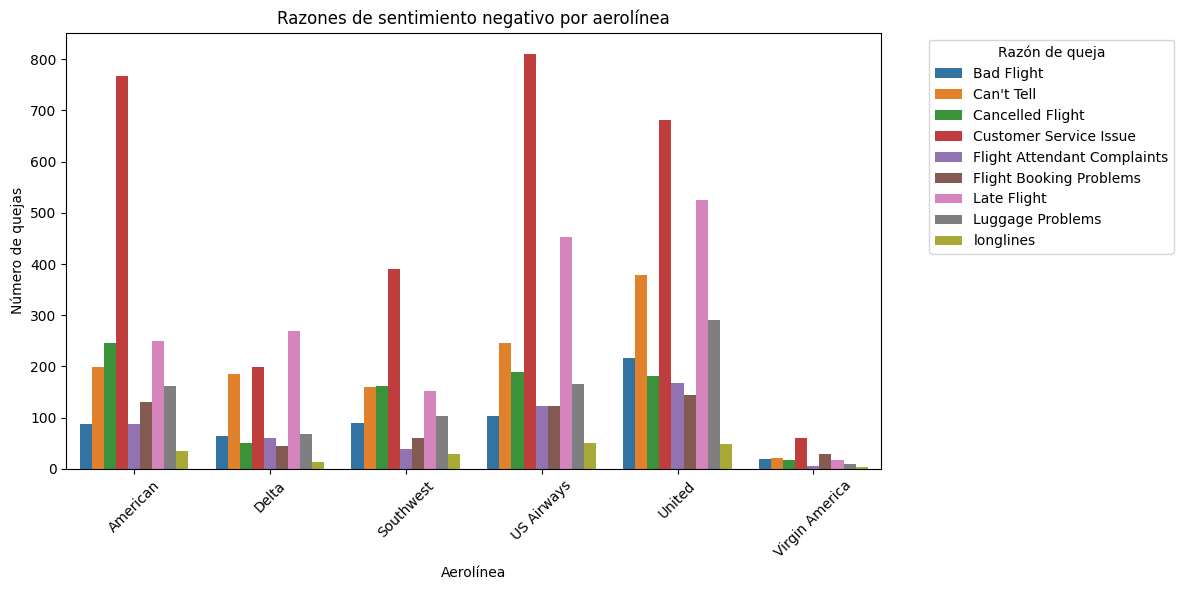

In [158]:
neg_reasons_by_airline = new_data[new_data['airline_sentiment'] == 'negative'].groupby(['airline', 'negativereason']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=neg_reasons_by_airline, x='airline', y='count', hue='negativereason')
plt.title('Razones de sentimiento negativo por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de quejas')
plt.legend(title='Razón de queja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sentimientos por ciudad del tweet

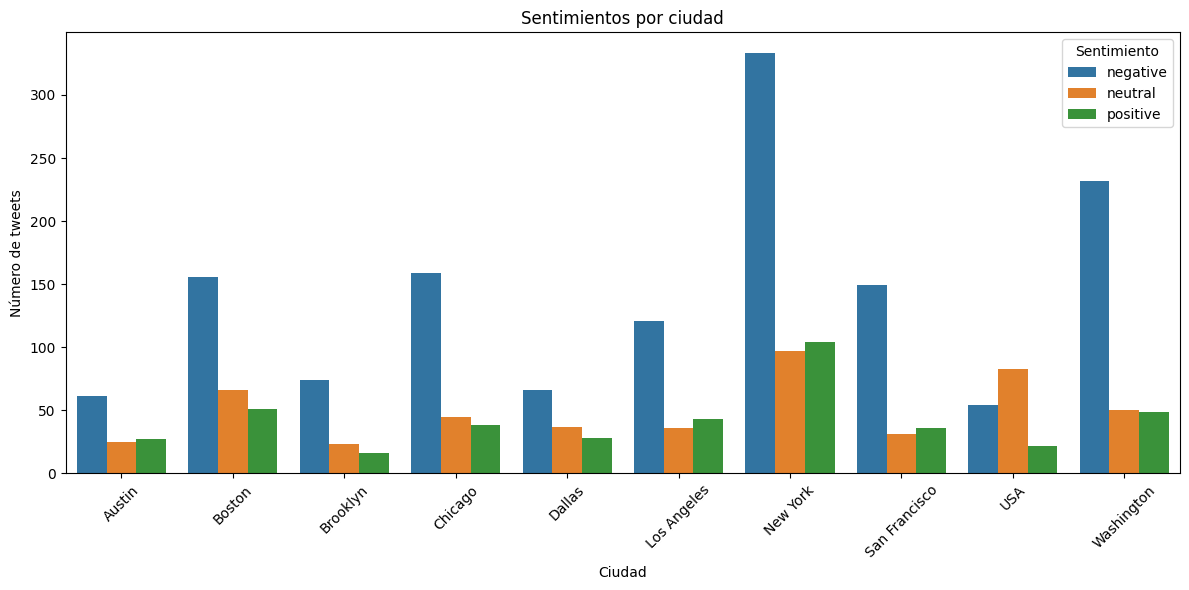

In [161]:
city_sentiments_df = new_data.copy()
city_sentiments_df = city_sentiments_df[city_sentiments_df['city_final']!='other']
top_cities = city_sentiments_df['city_final'].value_counts().head(10).index
city_sentiments = city_sentiments_df[city_sentiments_df['city_final'].isin(top_cities)].groupby(['city_final', 'airline_sentiment']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=city_sentiments, x='city_final', y='count', hue='airline_sentiment')
plt.title('Sentimientos por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de tweets')
plt.legend(title='Sentimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Razones de sentimiento negativo por ciudad del tweet

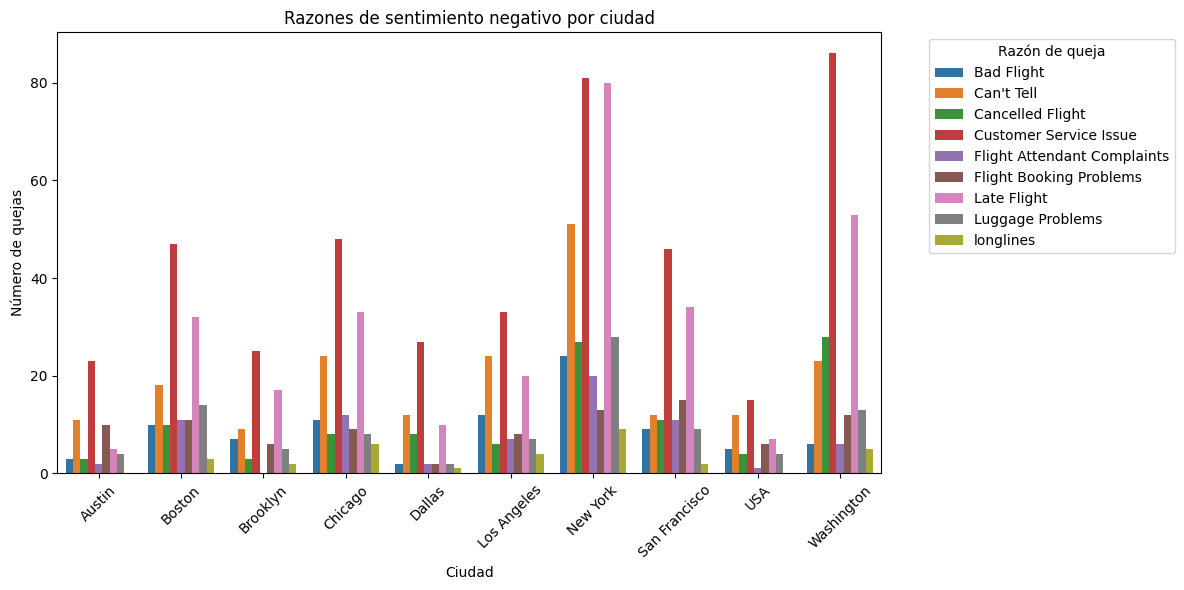

In [162]:
neg_reasons_by_city = city_sentiments_df[(city_sentiments_df['airline_sentiment'] == 'negative') & (city_sentiments_df['city_final'].isin(top_cities))].groupby(['city_final', 'negativereason']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=neg_reasons_by_city, x='city_final', y='count', hue='negativereason')
plt.title('Razones de sentimiento negativo por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de quejas')
plt.legend(title='Razón de queja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# EDA Variable text (contenido del tweet)

## 1. Exploración inicial

### Longitud promedio por tweet

In [163]:
new_data['text_length'] = new_data['text'].apply(len)
print(new_data['text_length'].describe())

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text_length, dtype: float64


Cada tweet tiene en promedio 103 caracteres

### Wordcloud

In [54]:
from wordcloud import WordCloud

In [164]:
def show_wordcloud(text_series, title='WordCloud'):
  text = ' '.join(text_series)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

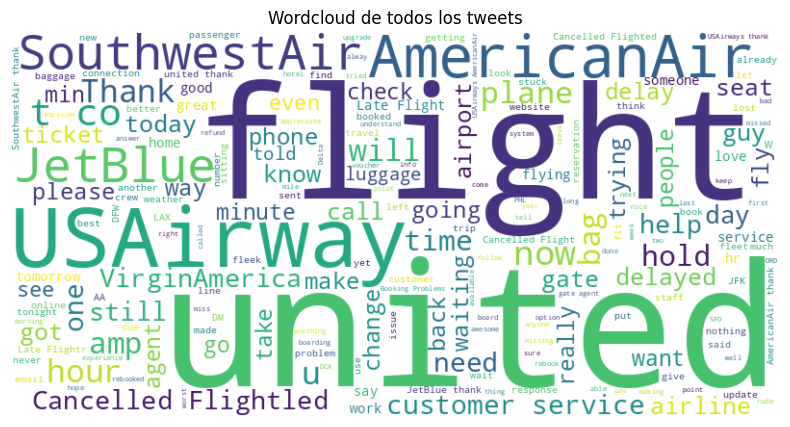

In [165]:
show_wordcloud(new_data['text'], title='Wordcloud de todos los tweets')

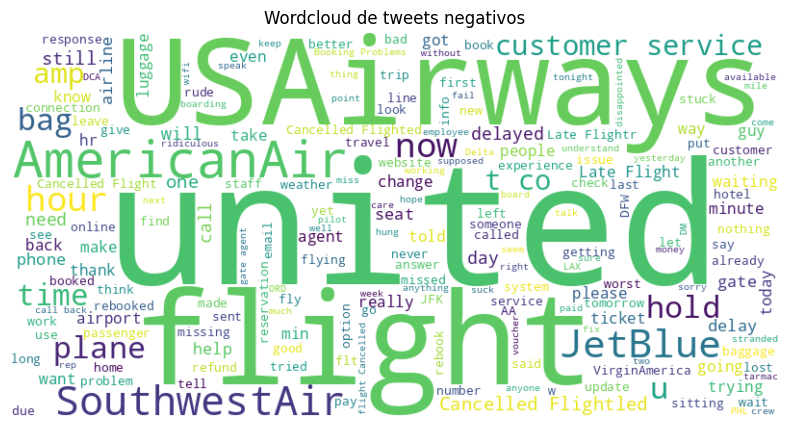

In [166]:
show_wordcloud(new_data[new_data['airline_sentiment']=='negative']['text'], title='Wordcloud de tweets negativos')

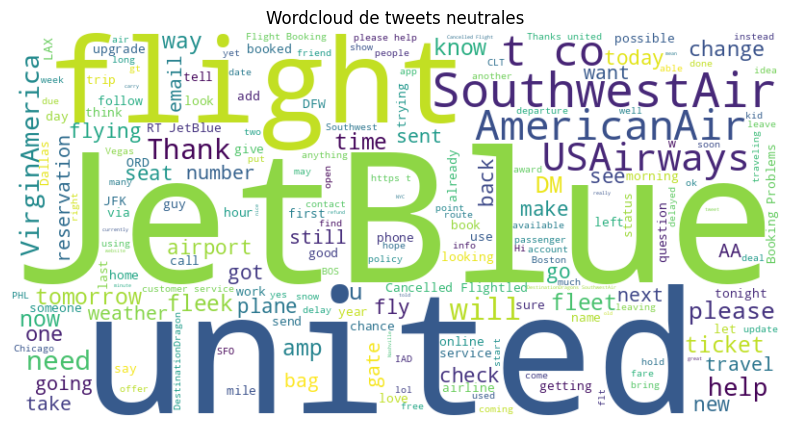

In [167]:
show_wordcloud(new_data[new_data['airline_sentiment']=='neutral']['text'], title='Wordcloud de tweets neutrales')

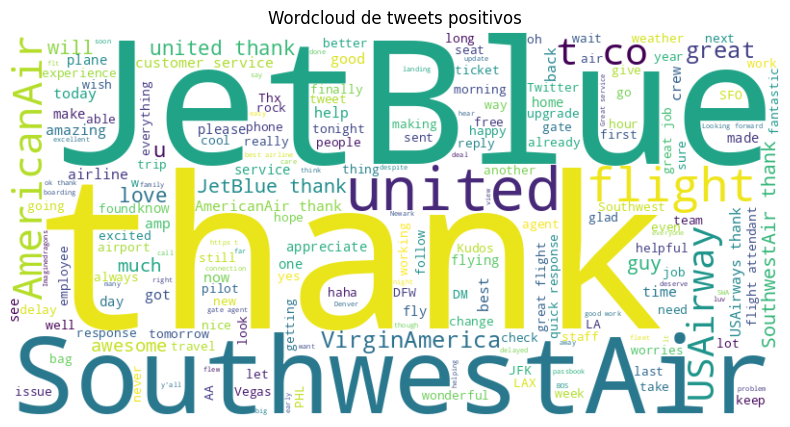

In [168]:
show_wordcloud(new_data[new_data['airline_sentiment']=='positive']['text'], title='Wordcloud de tweets positivos')

Se generó un wordcloud por sentimiento para obtener un vistazo general del vocabulario crudo.

## 2. Limpieza y tokenización

In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [61]:
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

### Tokenización

In [62]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [63]:
lemmatizer = WordNetLemmatizer()

In [64]:
def clean_tokenize(text):
  text = text.lower()
  text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words and len(word)>1]

  pos_tags = pos_tag(tokens)
  tokens_lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
  return tokens_lemmatized

In [169]:
new_data['tokens'] = new_data['text'].apply(clean_tokenize)

Hemos aplicado tokenización para descartar el ruido en nuestra próximas visualizaciones

### Tokens más frecuentes por sentimiento

In [109]:
def plot_tokens(counter, title, n):
  common = counter.most_common(n)
  df = pd.DataFrame(common, columns=['token', 'count'])
  plt.figure(figsize=(10,5))
  sns.barplot(data=df, x='token', y='count', palette='viridis', hue='token', legend=False)
  plt.title(title)
  plt.xlabel('Frecuencia')
  plt.ylabel('Token')
  plt.tight_layout()
  plt.show()

Tokens más frecuentes para sentimientos negativo

In [67]:
from collections import Counter

neg_tokens = new_data[new_data['airline_sentiment'] == 'negative']['tokens'].sum()
Counter(neg_tokens).most_common(20)


[('flight', 3438),
 ('get', 1498),
 ('hour', 1079),
 ('cancel', 843),
 ('delay', 778),
 ('customer', 771),
 ('service', 766),
 ('time', 736),
 ('call', 682),
 ('hold', 667),
 ('wait', 649),
 ('help', 643),
 ('bag', 636),
 ('plane', 586),
 ('im', 547),
 ('go', 539),
 ('cant', 486),
 ('u', 483),
 ('still', 481),
 ('amp', 473)]

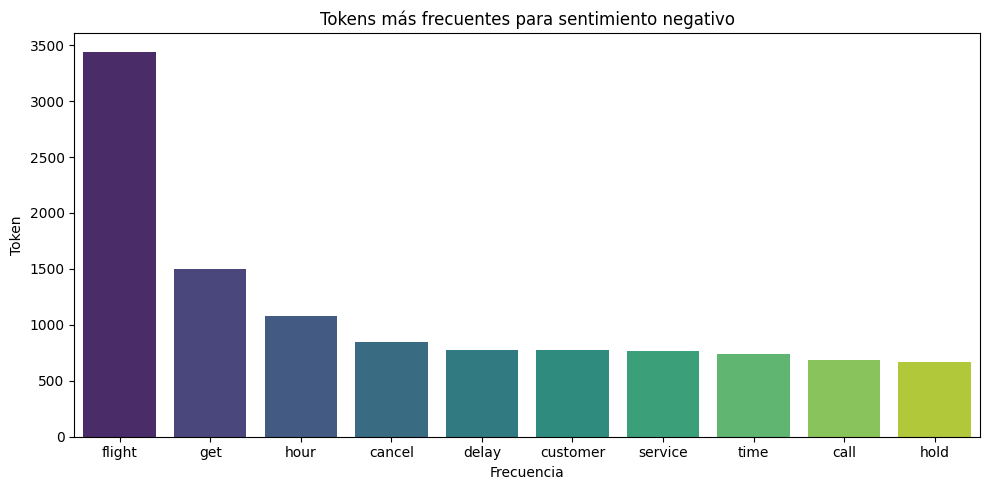

In [110]:
plot_tokens(Counter(neg_tokens), 'Tokens más frecuentes para sentimiento negativo', 10)

Tokens mas frecuentes para sentimiento positivo

In [69]:
positive_tokens = new_data[new_data['airline_sentiment'] == 'positive']['tokens'].sum()
Counter(positive_tokens).most_common(20)

[('thanks', 603),
 ('thank', 458),
 ('flight', 435),
 ('get', 249),
 ('great', 236),
 ('service', 161),
 ('make', 152),
 ('love', 146),
 ('fly', 141),
 ('customer', 122),
 ('good', 120),
 ('guy', 117),
 ('help', 113),
 ('much', 109),
 ('time', 106),
 ('airline', 105),
 ('best', 104),
 ('awesome', 97),
 ('u', 88),
 ('well', 83)]

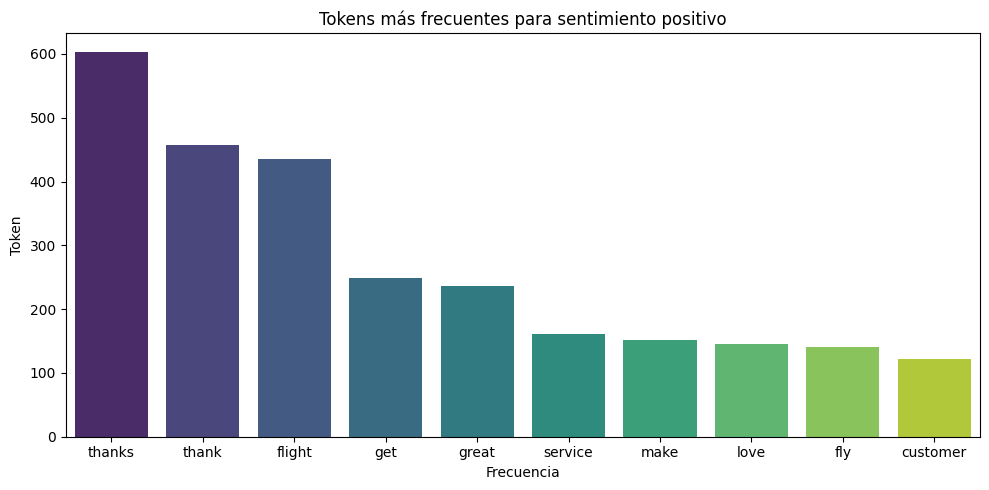

In [111]:
plot_tokens(Counter(positive_tokens), 'Tokens más frecuentes para sentimiento positivo', 10)

Tokens más frecuentes para sentimiento neutral

In [71]:
neutral_tokens = new_data[new_data['airline_sentiment'] == 'neutral']['tokens'].sum()
Counter(neutral_tokens).most_common(20)

[('flight', 776),
 ('get', 342),
 ('need', 184),
 ('please', 178),
 ('help', 164),
 ('fly', 162),
 ('thanks', 154),
 ('go', 139),
 ('im', 136),
 ('dm', 123),
 ('would', 122),
 ('book', 116),
 ('know', 112),
 ('ticket', 112),
 ('change', 110),
 ('u', 108),
 ('tomorrow', 106),
 ('fleek', 106),
 ('time', 105),
 ('fleet', 103)]

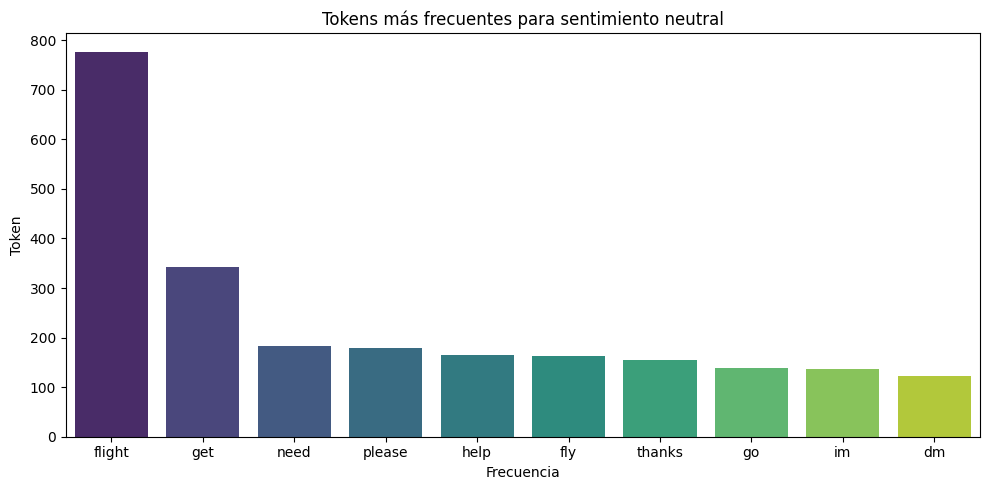

In [112]:
plot_tokens(Counter(neutral_tokens), 'Tokens más frecuentes para sentimiento neutral', 10)

### Tokens más frecuentes por razón negativa

In [227]:
negative_reasons = new_data[new_data['airline_sentiment']=='negative']['negativereason'].unique().tolist()

In [171]:
for reason in negative_reasons:
  print(reason)
  print(Counter(new_data[new_data['negativereason']==reason]['tokens'].sum()).most_common(20))
  print('\t')

Bad Flight
[('flight', 235), ('seat', 128), ('plane', 125), ('get', 74), ('wifi', 66), ('time', 39), ('work', 38), ('fly', 36), ('pay', 33), ('make', 33), ('one', 32), ('go', 31), ('airline', 31), ('im', 31), ('bad', 30), ('sit', 29), ('dont', 29), ('u', 29), ('amp', 28), ('board', 28)]
	
Can't Tell
[('flight', 158), ('get', 125), ('airline', 117), ('fly', 108), ('bad', 77), ('im', 71), ('go', 69), ('make', 65), ('time', 64), ('dont', 61), ('never', 61), ('would', 55), ('u', 53), ('ever', 53), ('like', 50), ('customer', 48), ('help', 48), ('need', 47), ('say', 45), ('take', 45)]
	
Late Flight
[('flight', 915), ('delay', 640), ('hour', 417), ('get', 291), ('plane', 255), ('time', 210), ('wait', 206), ('late', 188), ('gate', 161), ('sit', 157), ('miss', 154), ('go', 120), ('still', 117), ('u', 116), ('leave', 105), ('im', 102), ('fly', 90), ('make', 89), ('min', 87), ('connection', 85)]
	
Customer Service Issue
[('flight', 602), ('customer', 585), ('service', 579), ('get', 512), ('call',

#### Gráficos por separado

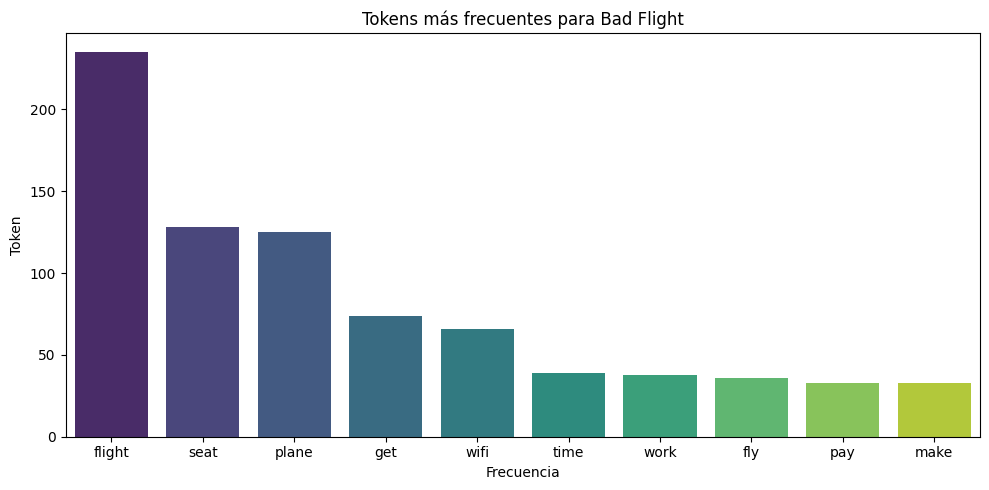

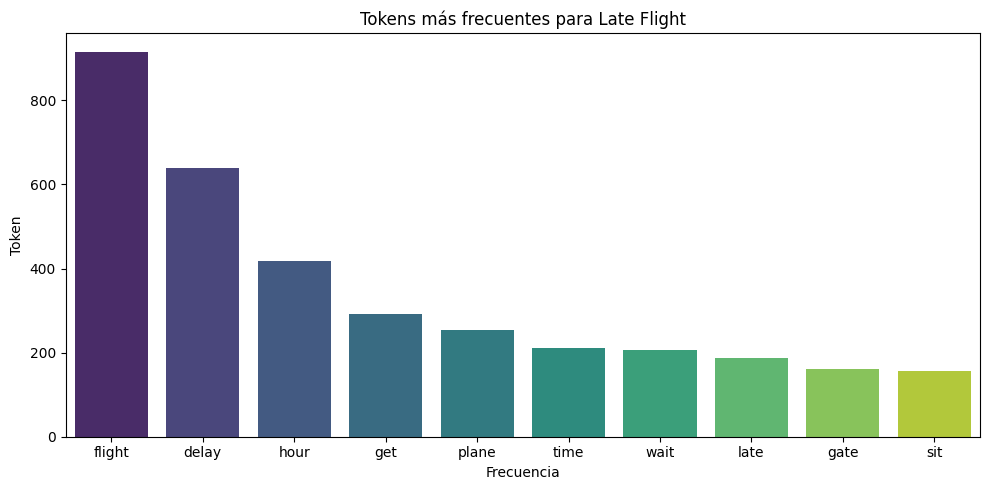

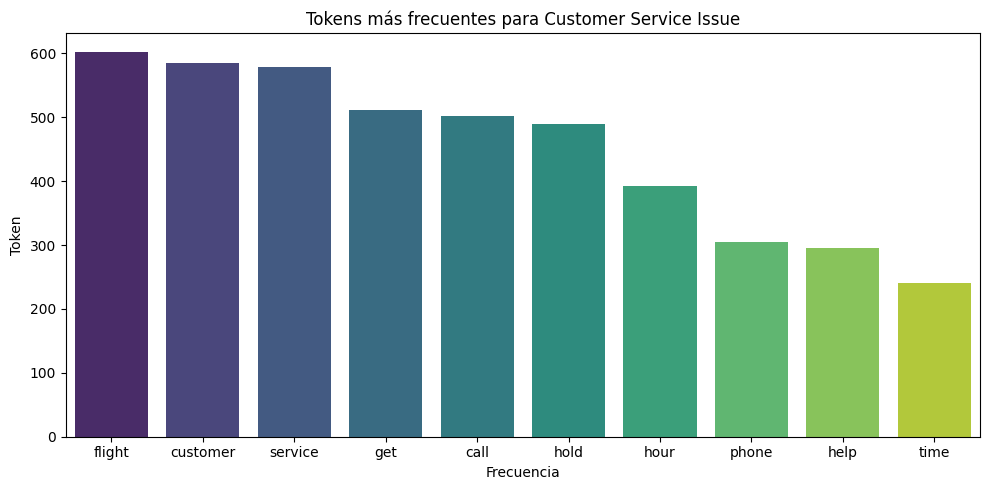

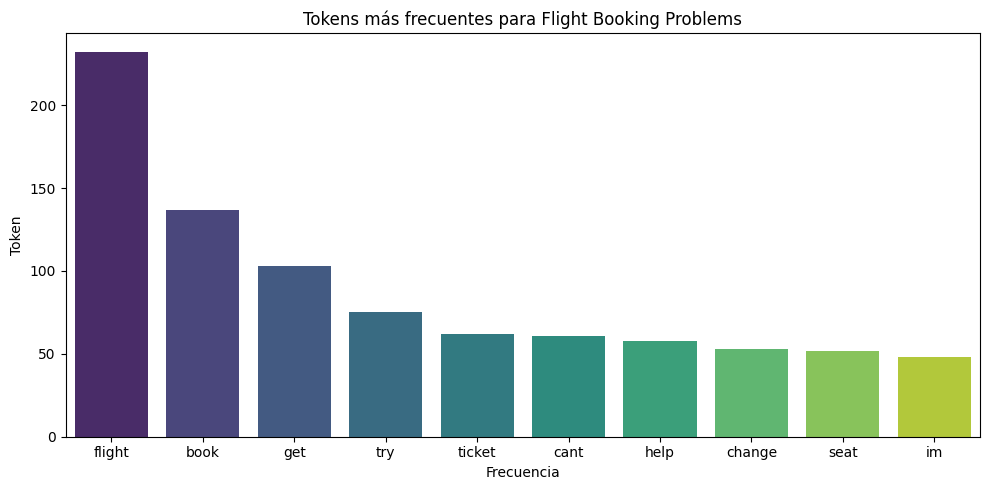

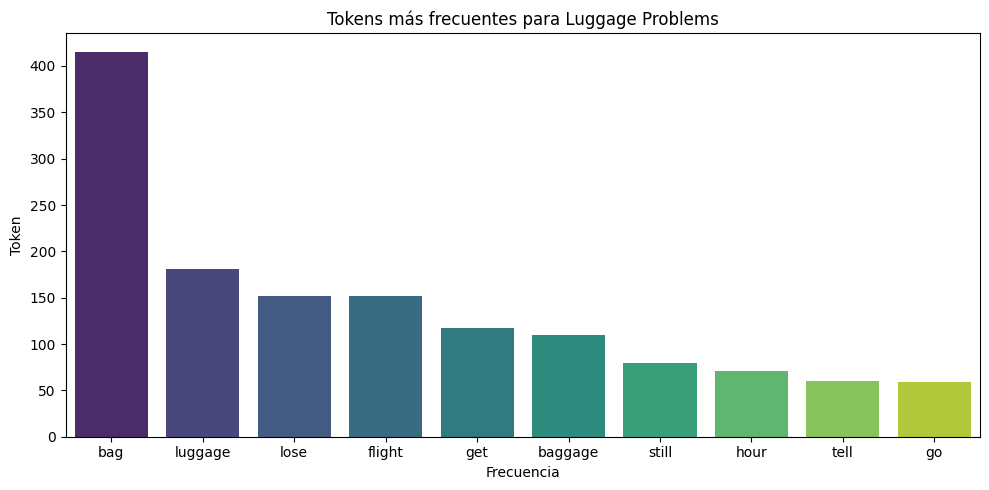

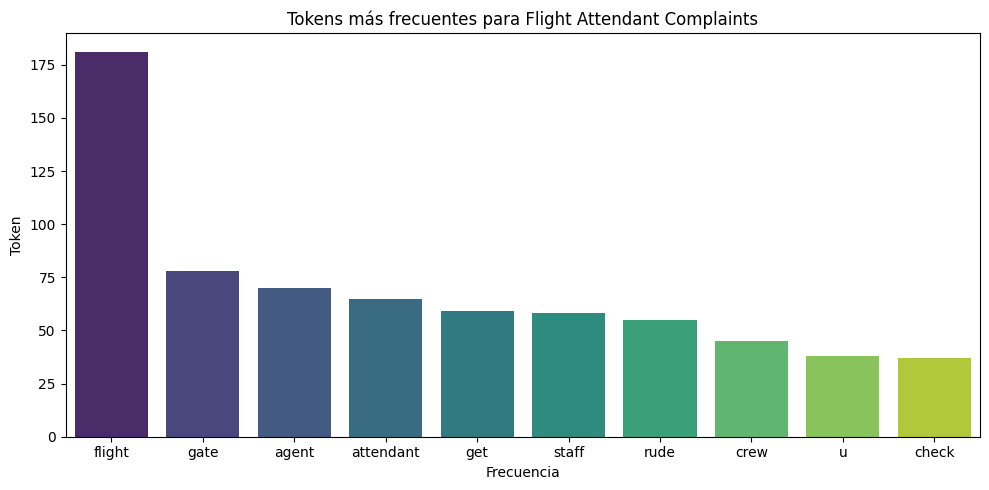

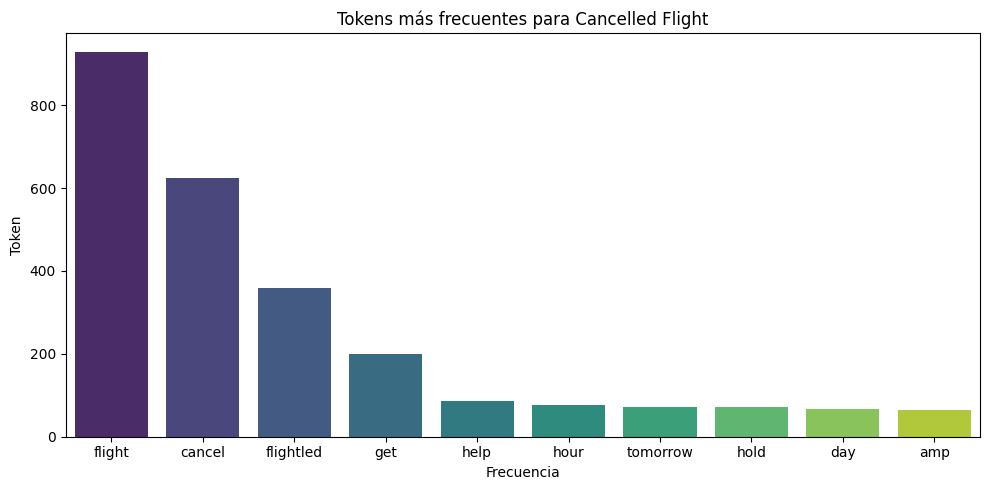

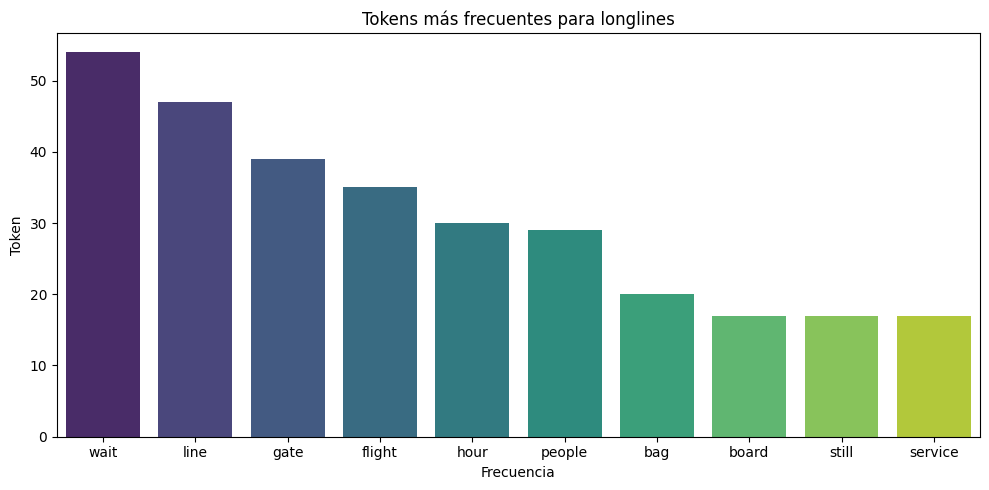

In [228]:
for reason in negative_reasons:
  plot_tokens(Counter(new_data[new_data['negativereason']==reason]['tokens'].sum()), f'Tokens más frecuentes para {reason}', 10)


#### Subplot

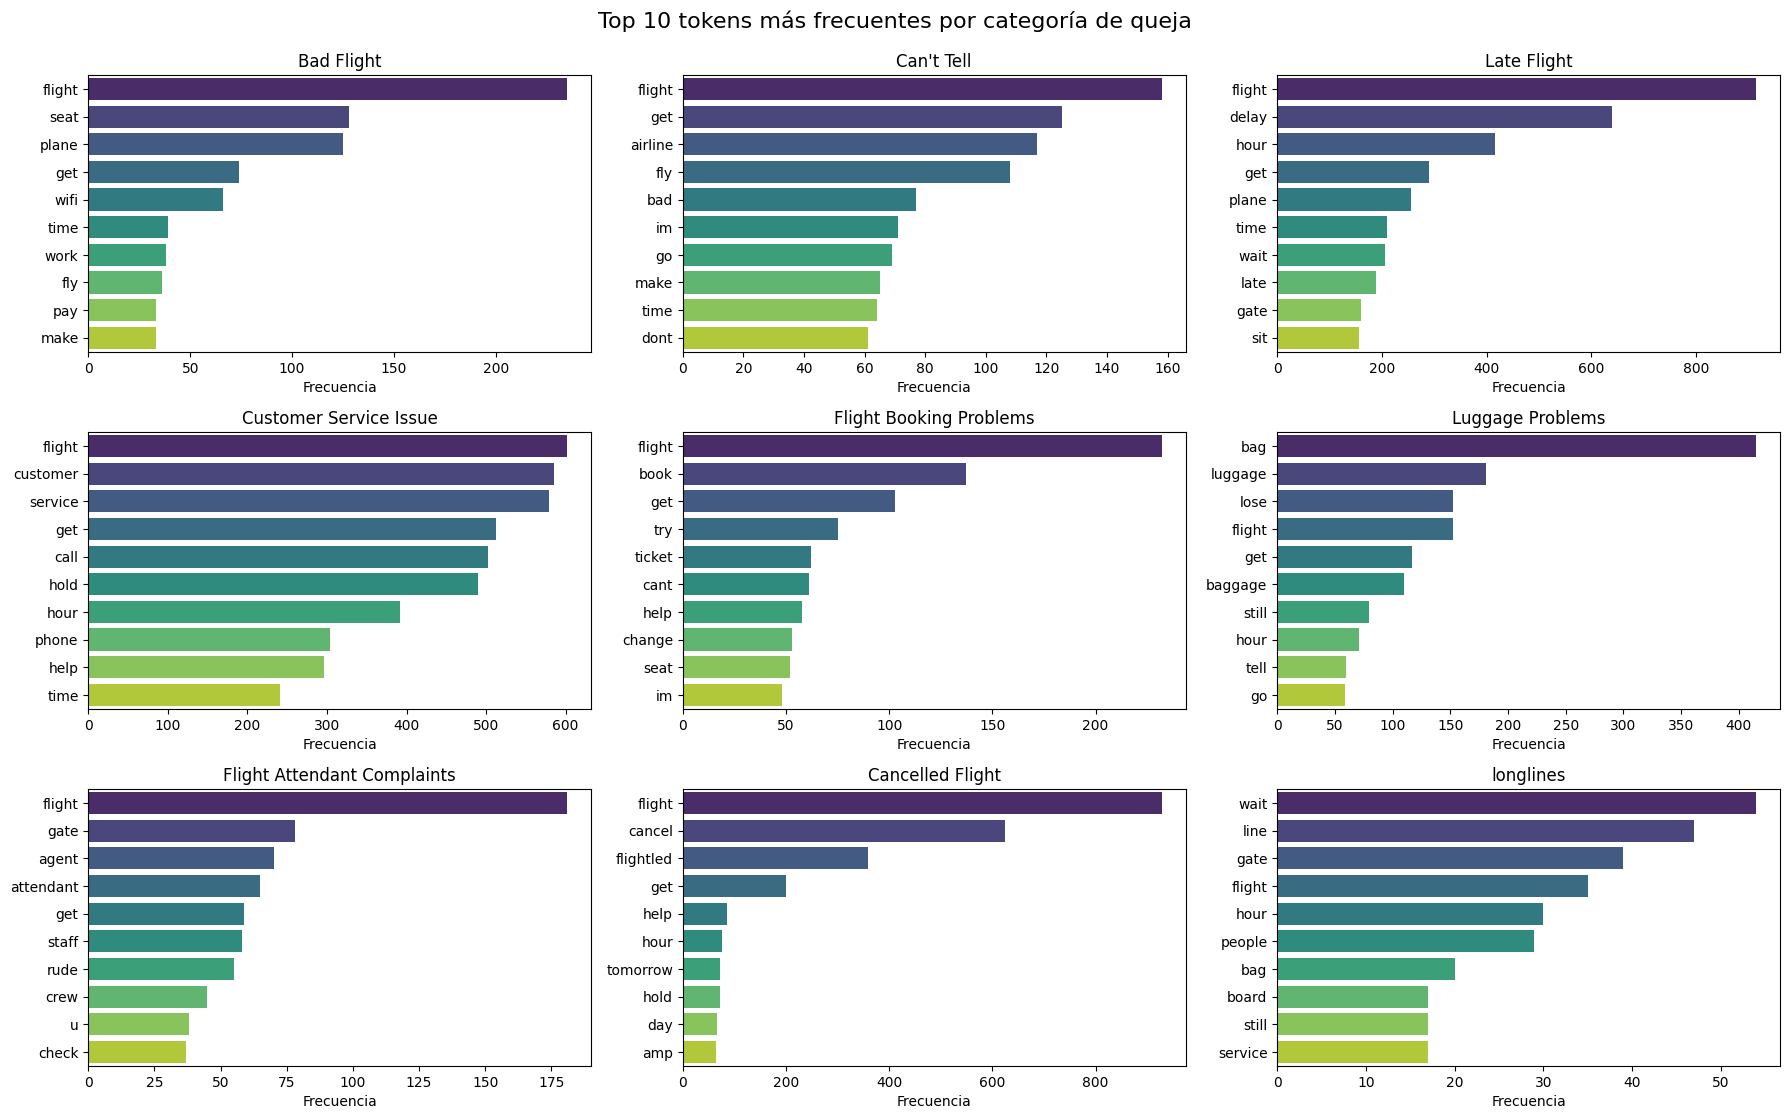

In [172]:
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()  # Para indexar más fácilmente

for i, reason in enumerate(negative_reasons):
    tokens = new_data[new_data['negativereason'] == reason]['tokens'].sum()
    common = Counter(tokens).most_common(10)
    df = pd.DataFrame(common, columns=['token', 'count'])

    sns.barplot(ax=axes[i], data=df, x='count', y='token', hue='token', legend=False, palette='viridis')
    axes[i].set_title(reason)
    axes[i].set_xlabel('Frecuencia')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Top 10 tokens más frecuentes por categoría de queja", fontsize=16, y=1.02)
plt.show()

### Tokens más frecuentes por aerolinea

In [75]:
airlines = new_data['airline'].unique().tolist()

#### Gráficos por separado

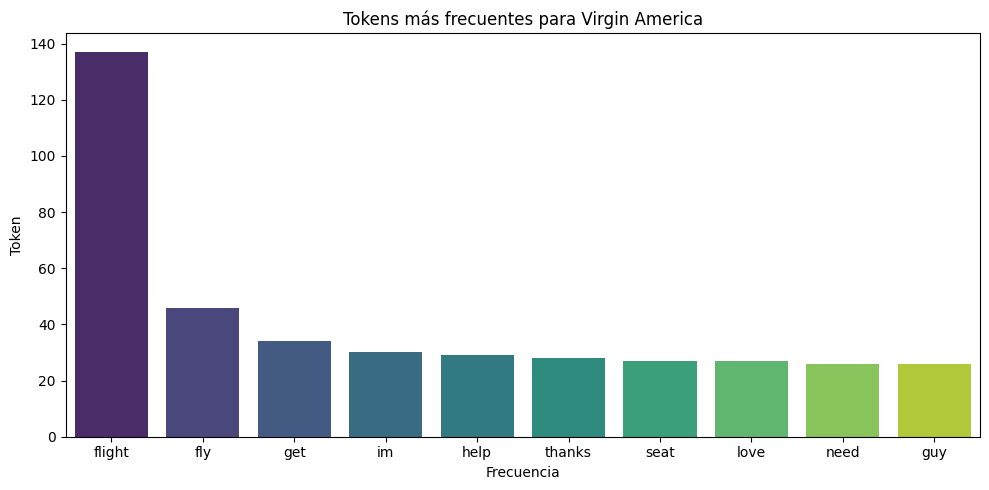

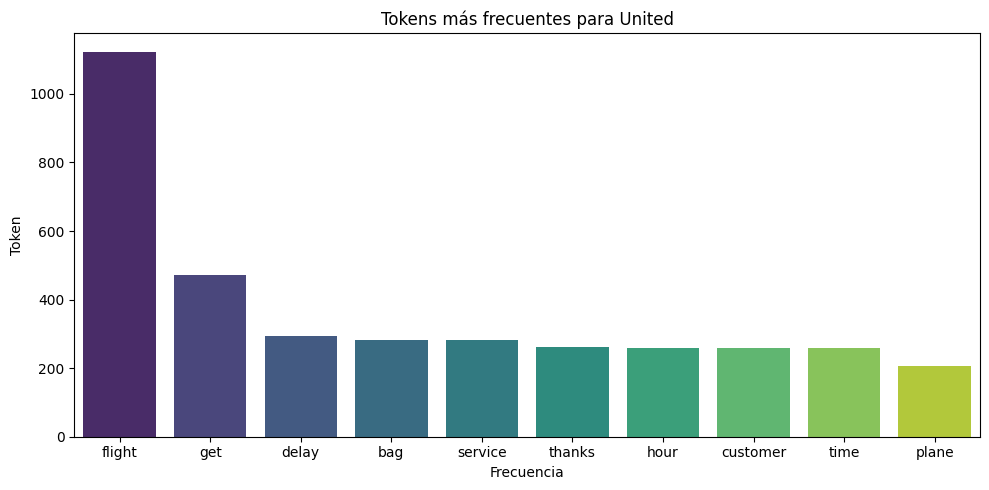

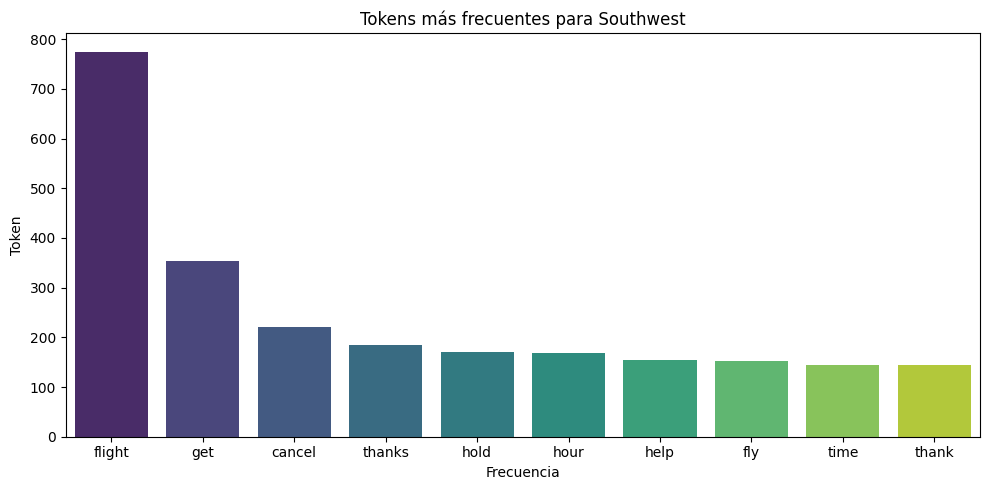

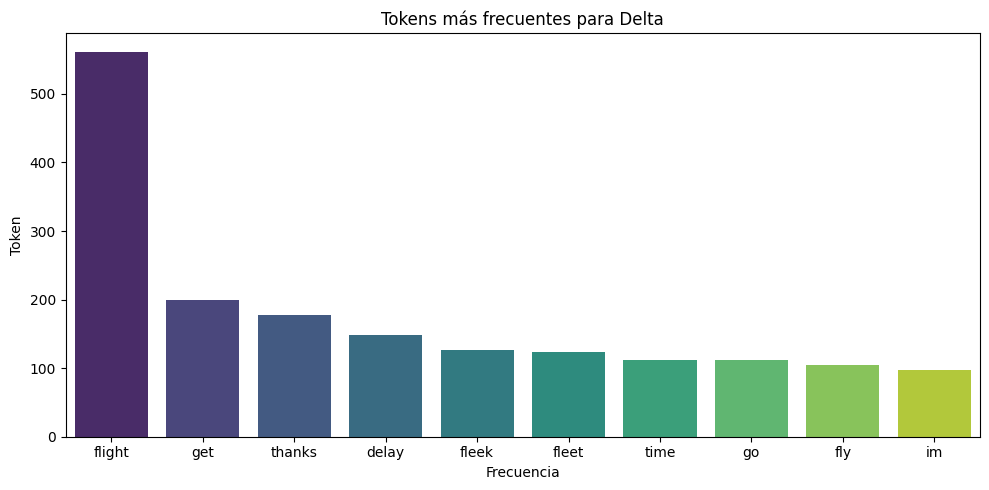

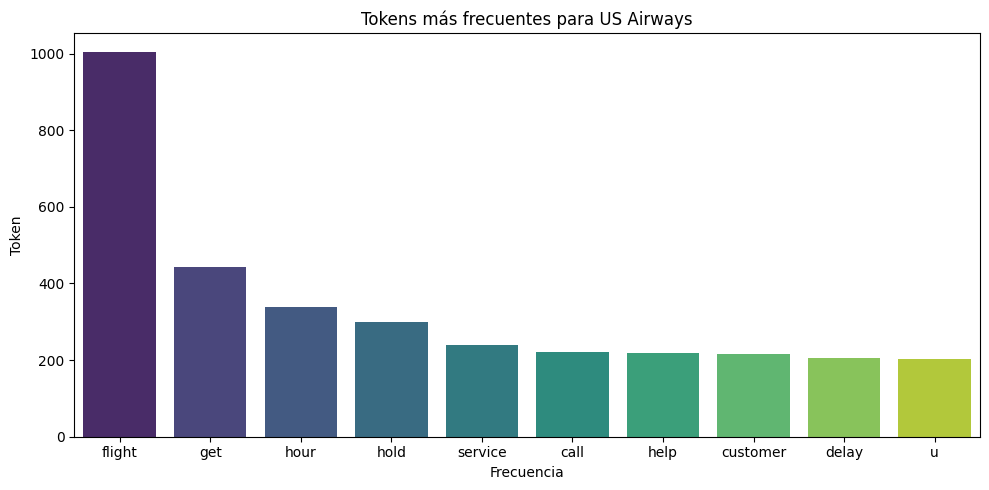

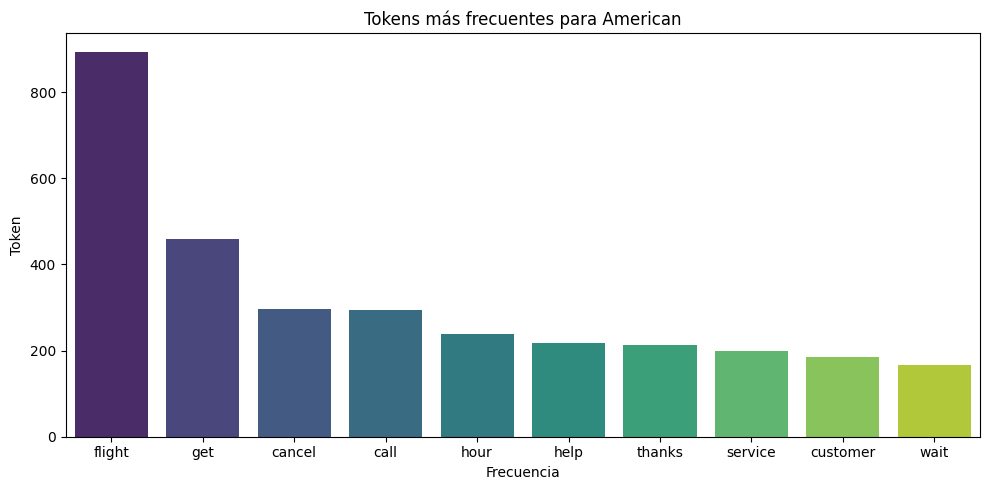

In [229]:
for airline in airlines:
  plot_tokens(Counter(new_data[new_data['airline']==airline]['tokens'].sum()), f'Tokens más frecuentes para {airline}', 10)


#### Subplot

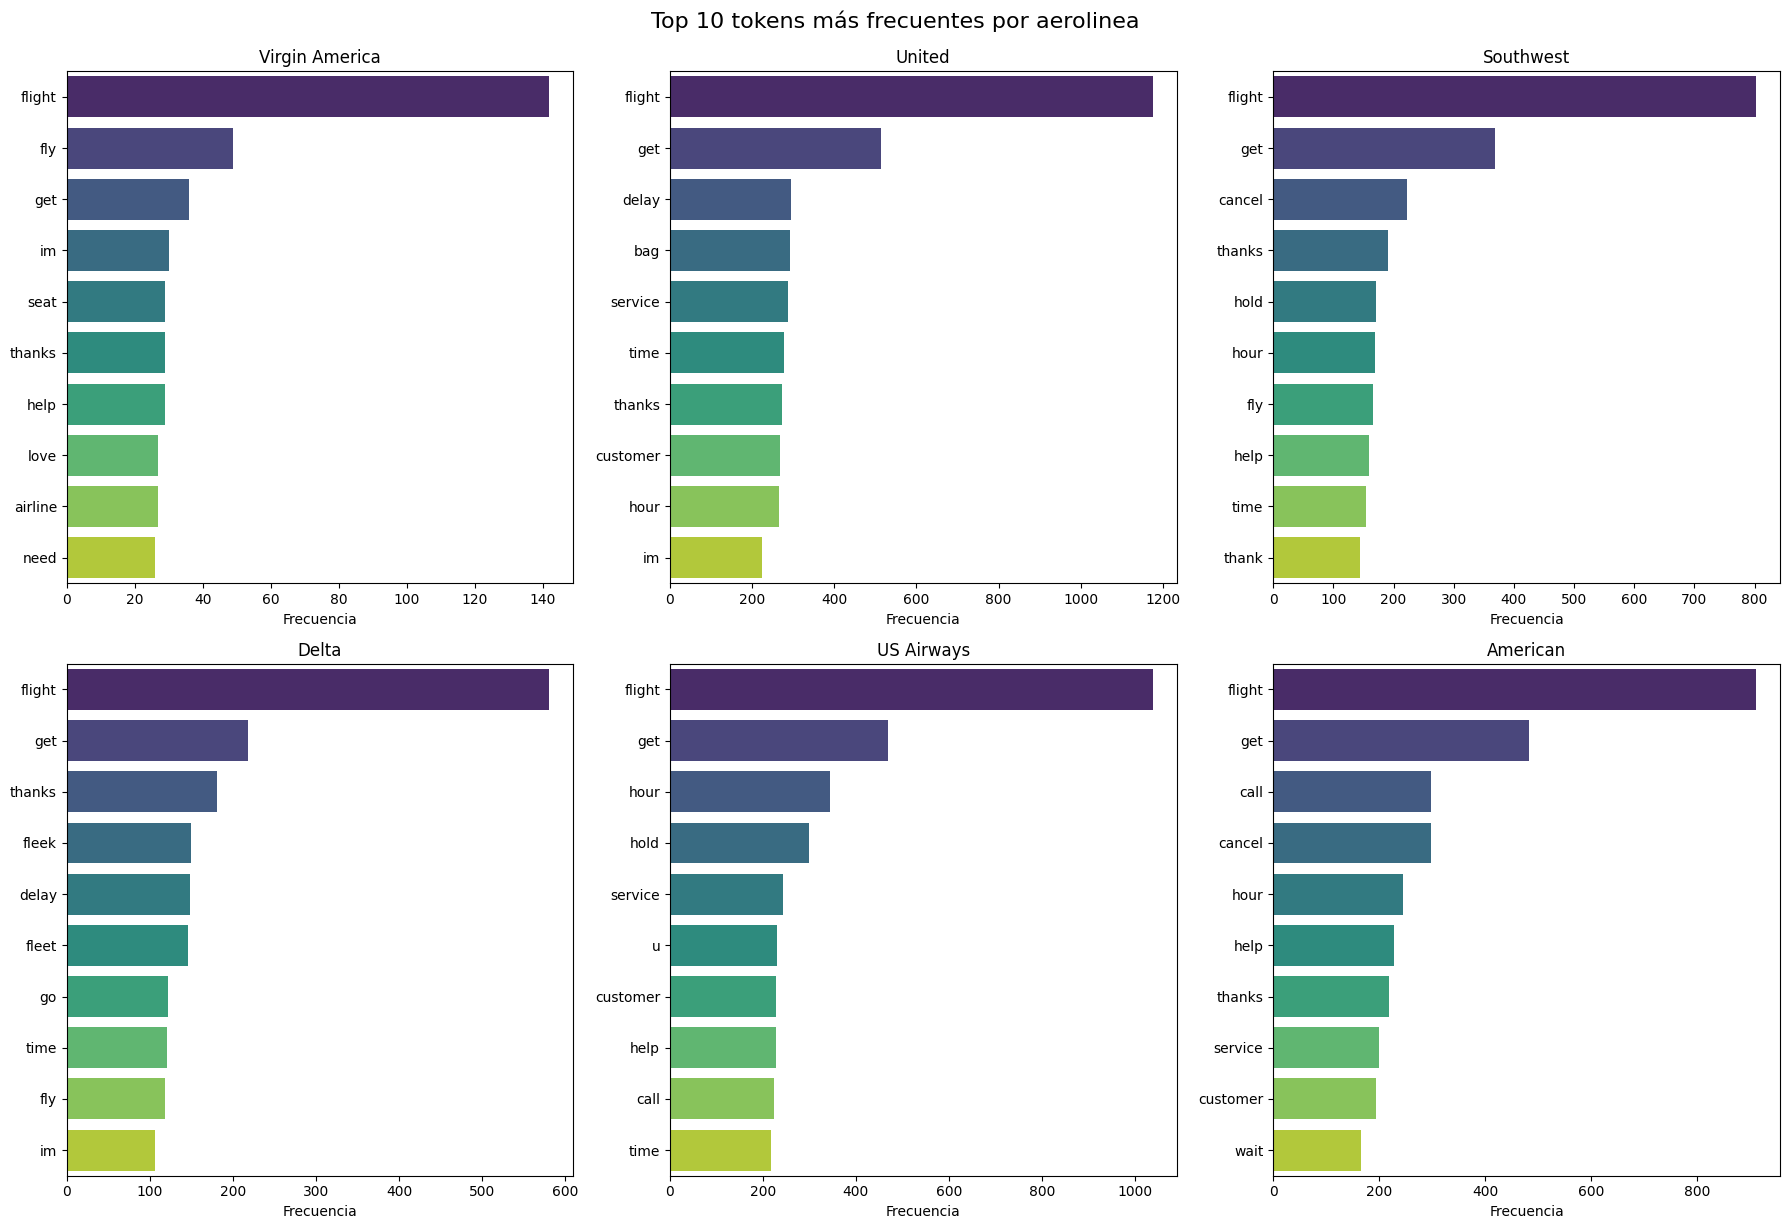

In [194]:
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  # Para indexar más fácilmente

for i, airline in enumerate(airlines):
    tokens = new_data[new_data['airline'] == airline]['tokens'].sum()
    common = Counter(tokens).most_common(10)
    df = pd.DataFrame(common, columns=['token', 'count'])

    sns.barplot(ax=axes[i], data=df, x='count', y='token', hue='token', legend=False, palette='viridis')
    axes[i].set_title(airline)
    axes[i].set_xlabel('Frecuencia')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Top 10 tokens más frecuentes por aerolinea", fontsize=16, y=1.02)
plt.show()

### Posterior a la tokenización y limpieza de texto se realizó un conteo de los tokens más frecuentes por sentimiento, los gráficos resultantes nos permiten con más claridad los terminos más representativos. Por ejemplo, thanks, great y flight en tweets positivos o cancelled y flight en tweets negativos.

### Cuando hacemos visualizaciones por aerolínea el termino más frecuente es siempre flight, sin embargo, podemos ver algunas diferencias en el resto de términos que se asocian a problemas como equipaje perdido, dificultad para cambiar el ticket, servicio al cliente, etc.

### En el caso de  visualizaciones más específicas como razón negativa, podemos apreciar que el termino más frecuentes para casi todas es flight y el resto están relacionados con su negative_reason.

### Para tener resultados más representativos aplicaremos la frecuencia de documento invertida

## 3. Vectorización

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
new_data['clean_text'] = new_data['tokens'].apply(lambda x: ' '.join(x))

#### TF-IDF por negativereason

In [180]:
df_reason = new_data[new_data['negativereason'].notna()]

In [181]:
grouped_by_reason = df_reason.groupby('negativereason')['clean_text'].apply(lambda x: ' '.join(x)).reset_index()

In [182]:
# TF-IDF
vectorizer_reason = TfidfVectorizer(stop_words='english', max_features=1000, sublinear_tf=True, norm='l2')
matrix_reason = vectorizer_reason.fit_transform(grouped_by_reason['clean_text'])

tfidf_by_reason = pd.DataFrame(matrix_reason.toarray(), index=grouped_by_reason['negativereason'], columns=vectorizer_reason.get_feature_names_out())

# Top 10 tokens
top_terms_by_reason = {}
for reason in tfidf_by_reason.index:
    top_terms = tfidf_by_reason.loc[reason].sort_values(ascending=False).head(10)
    top_terms_by_reason[reason] = top_terms

top_terms_df = pd.DataFrame([
    {'negativereason': reason, 'token': token, 'tfidf': score}
    for reason, tokens in top_terms_by_reason.items()
    for token, score in tokens.items()
])


In [183]:
def plot_top_terms_reason(reason):
    data = top_terms_df[top_terms_df['negativereason'] == reason]
    plt.figure(figsize=(8,5))
    sns.barplot(data=data, x='tfidf', y='token', palette='viridis')
    plt.title(f'Top tokens por TF-IDF para {reason}')
    plt.xlabel('Score TF-IDF')
    plt.ylabel('Token')
    plt.tight_layout()
    plt.show()

#### Gráficos por separado

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


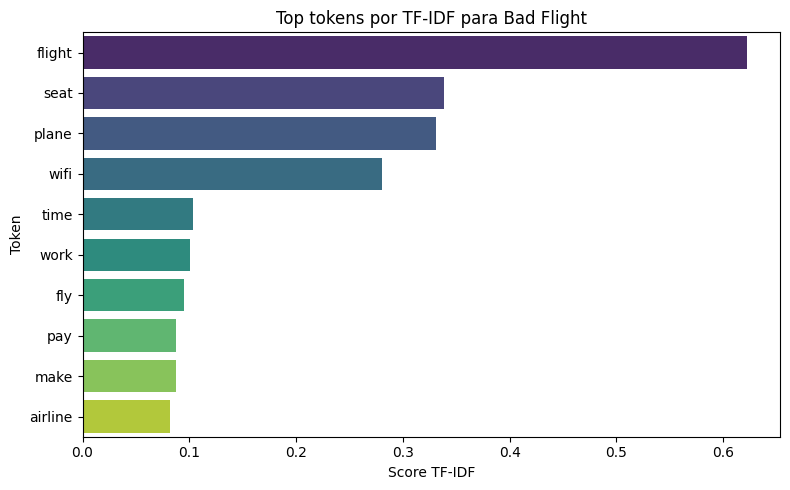

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


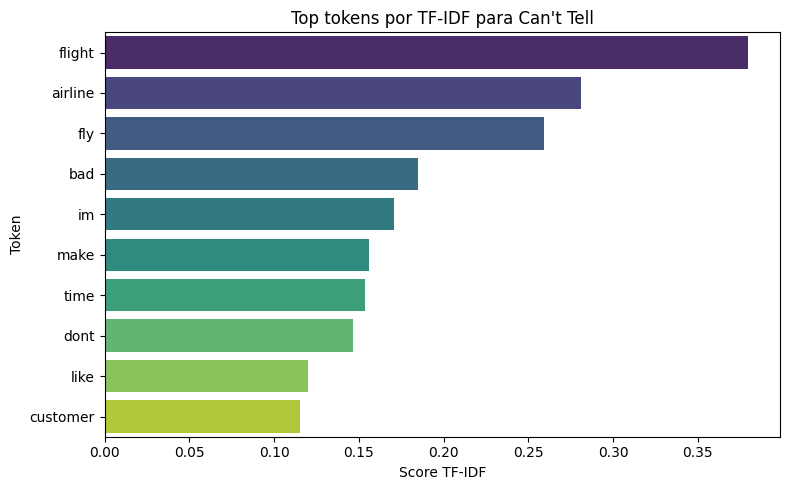

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


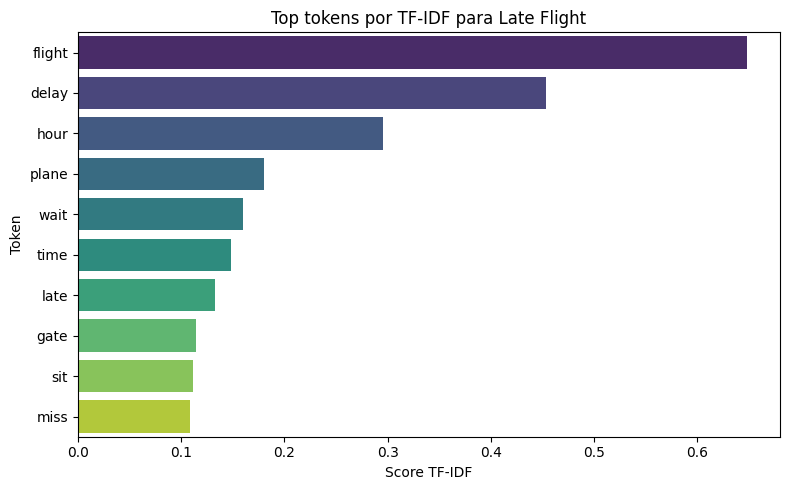

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


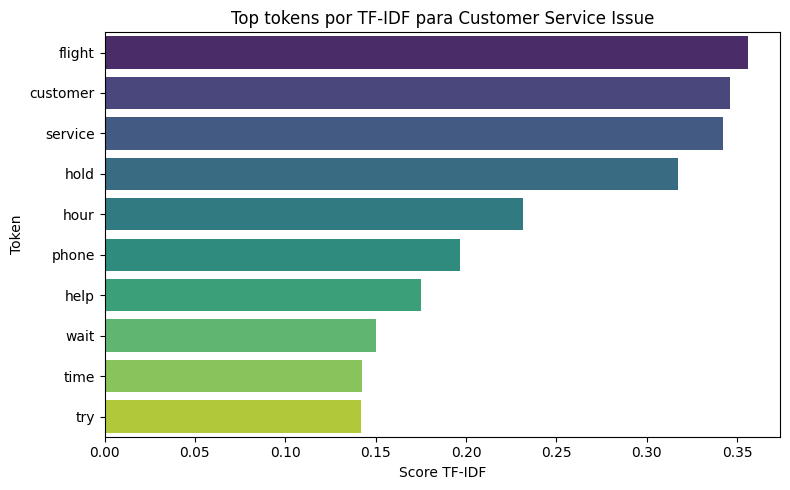

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


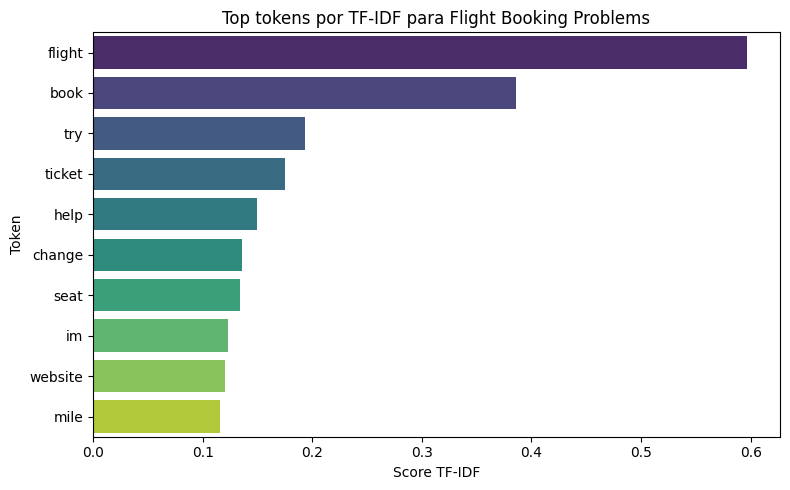

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


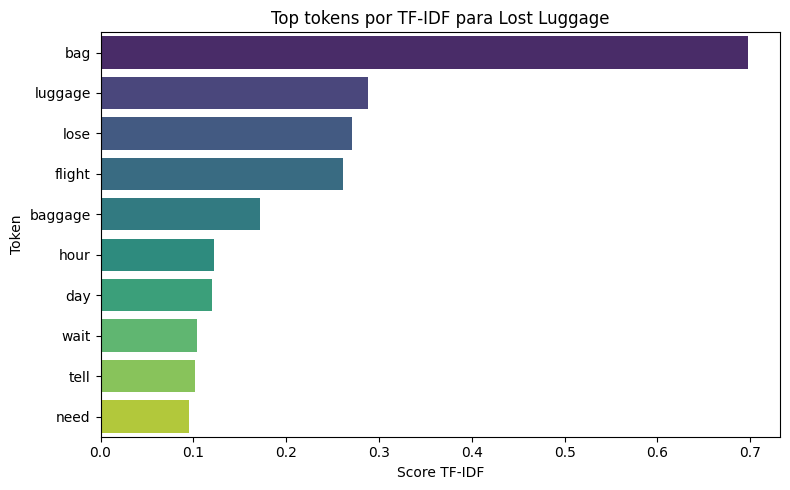

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


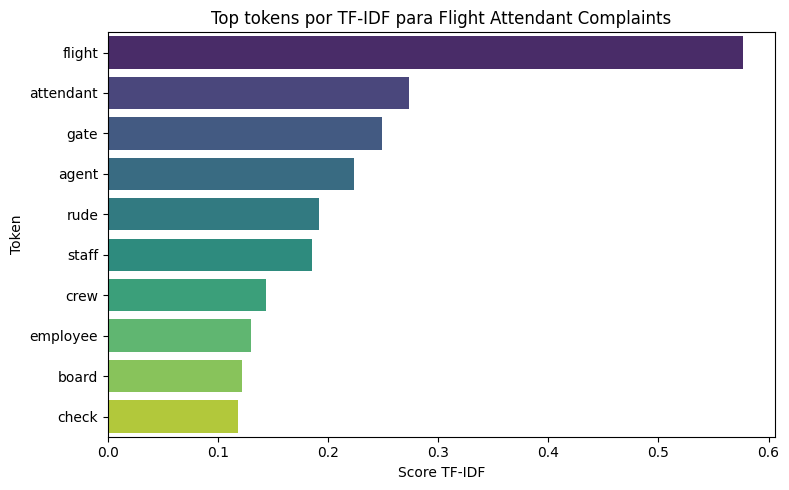

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


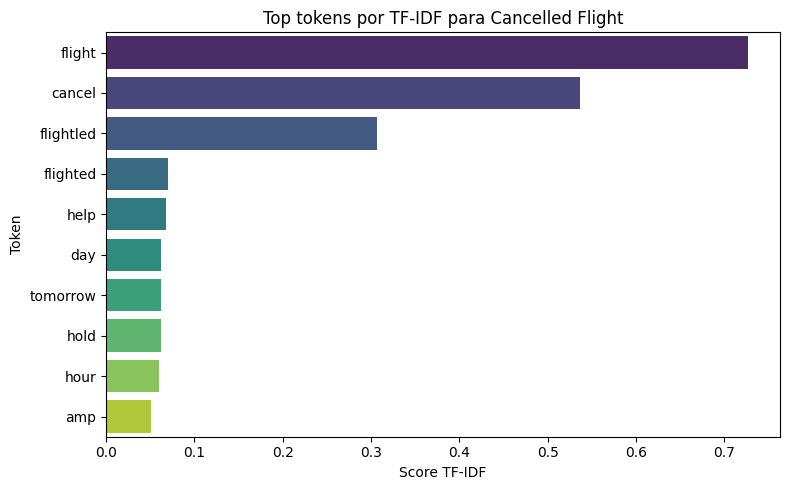

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


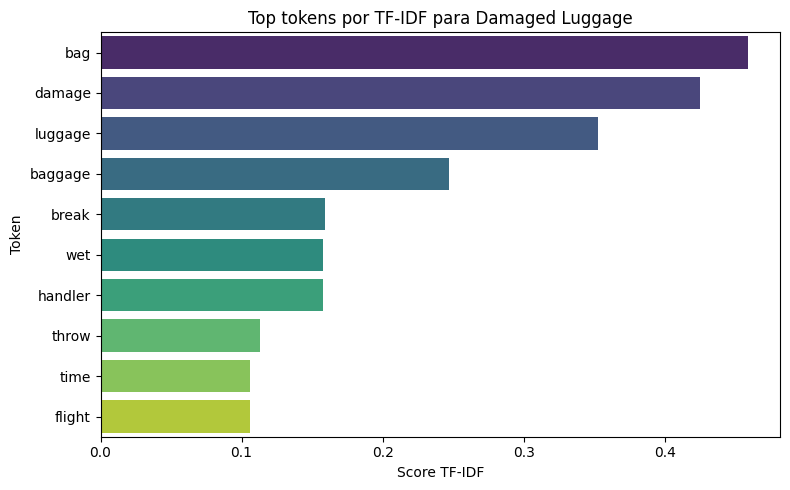

<ipython-input-122-ee2147c2d7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='tfidf', y='token', palette='viridis')


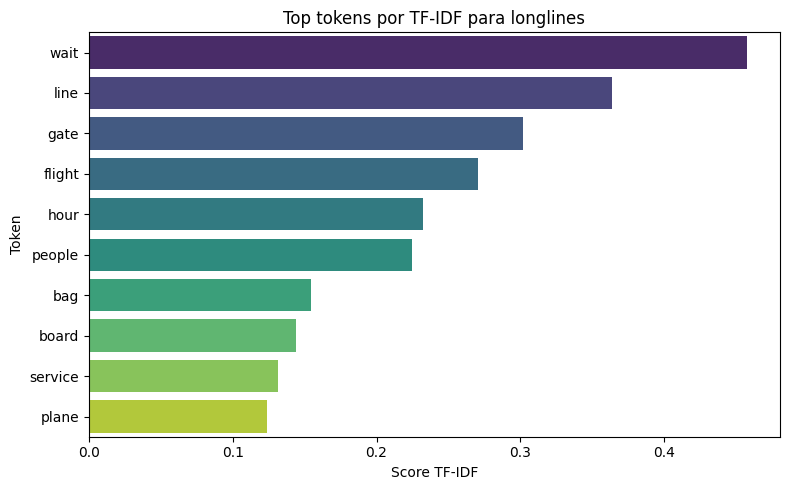

In [ ]:
for reason in negative_reasons:
  plot_top_terms_reason(reason)

#### Subplot

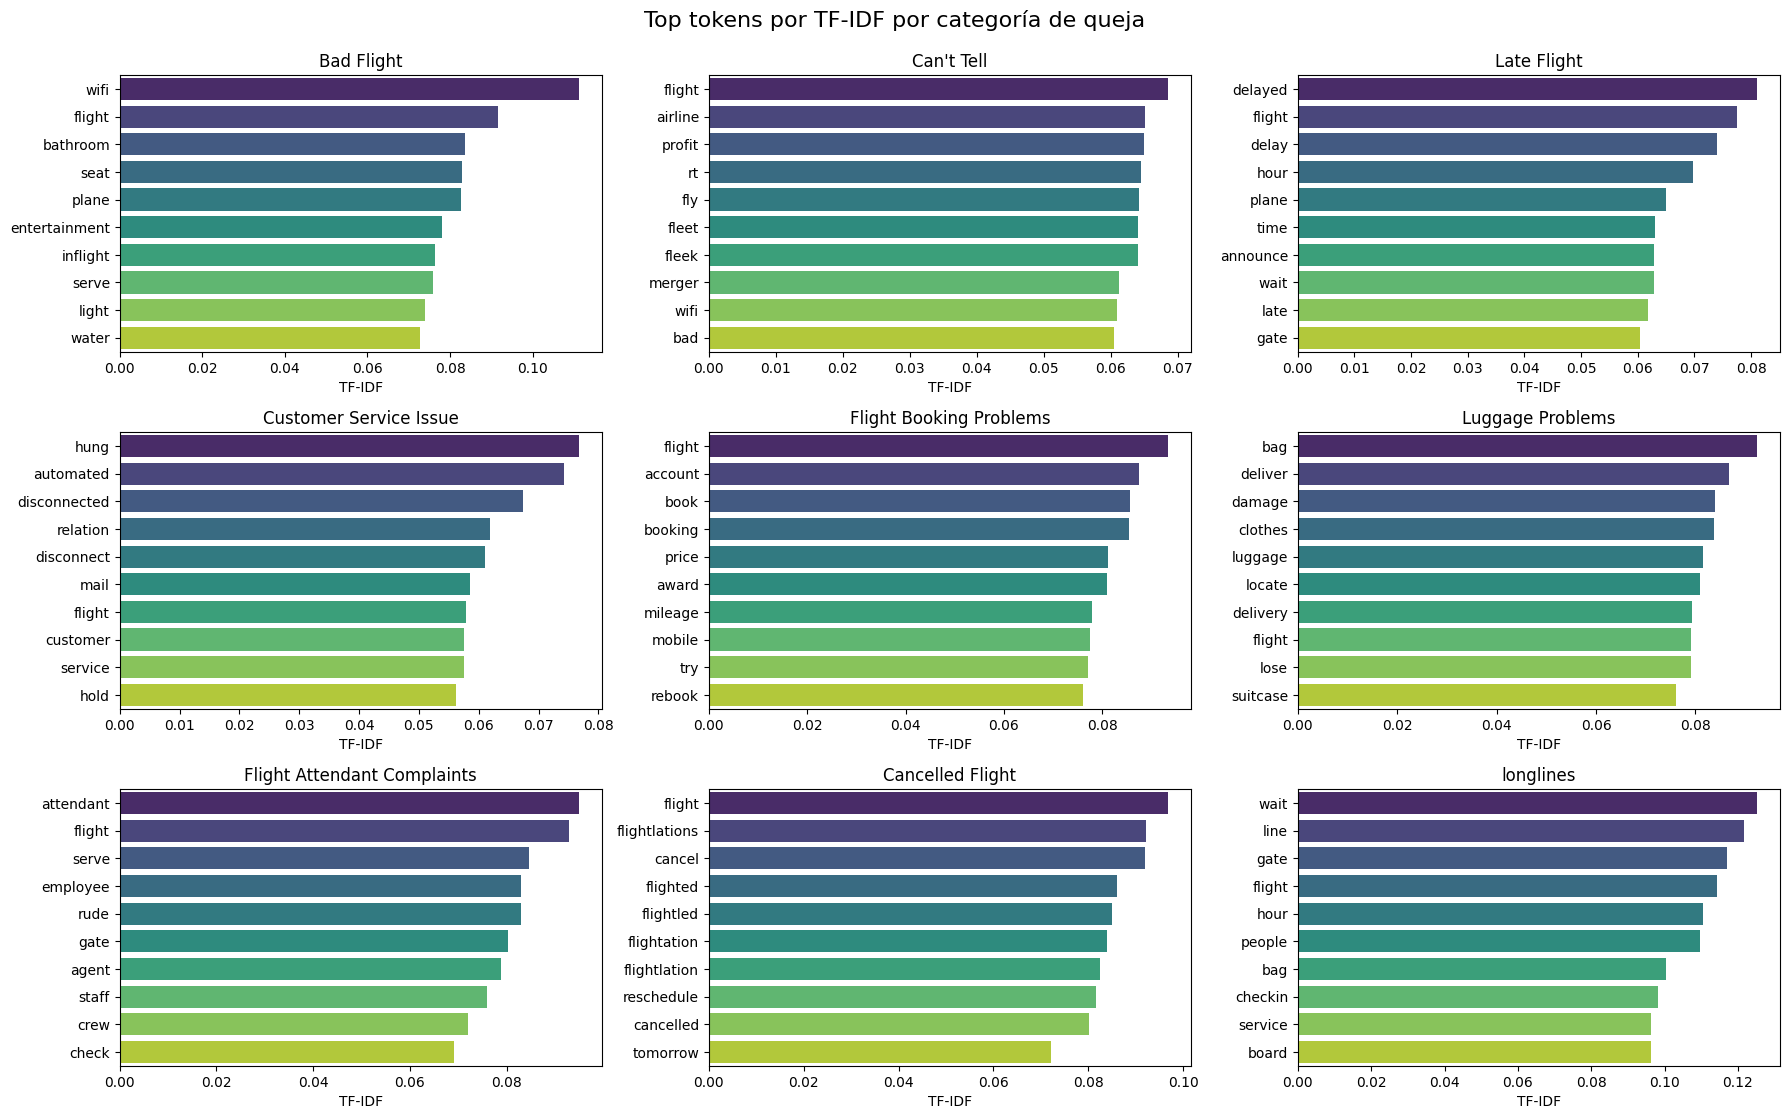

In [184]:
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

for i, reason in enumerate(negative_reasons):
    data = top_terms_df[top_terms_df['negativereason'] == reason]

    sns.barplot(ax=axes[i], data=data, x='tfidf', y='token', palette='viridis', hue='token', legend=False)
    axes[i].set_title(reason)
    axes[i].set_xlabel('TF-IDF')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Top tokens por TF-IDF por categoría de queja", fontsize=16, y=1.02)
plt.show()


#### Tras aplicar la vectorización TF-IDF con suavizado logarítmico y normalización L2, se observa que algunos términos altamente frecuentes como flight disminuyen su peso relativo, permitiendo resaltar otros tokens más específicos y representativos del motivo de queja.

####Por ejemplo, en Flight Attendant Complaints destacan términos como attendant, gate y rude, mientras que en Late Flight aparecen delay, hour, plane y wait. En el caso de Longlines, los términos más relevantes son gate, line, wait, desplazando incluso a flight.

####Estos patrones muestran que, una vez mitigado el efecto de los términos comunes, el vocabulario se vuelve más discriminativo, lo que refuerza la viabilidad de clasificar automáticamente los tuits por categoría de queja.

#### TF-IDF por aerolinea

In [83]:
df_airline = new_data[new_data['airline'].notna()]
grouped_by_airline = df_airline.groupby('airline')['clean_text'].apply(lambda x: ' '.join(x)).reset_index()

In [125]:
# TF-IDF
vectorizer_airline = TfidfVectorizer(stop_words='english', max_features=1000, sublinear_tf=True, norm='l2')
matrix_airline = vectorizer_airline.fit_transform(grouped_by_airline['clean_text'])

tfidf_by_airline = pd.DataFrame(matrix_airline.toarray(), index=grouped_by_airline['airline'], columns=vectorizer_airline.get_feature_names_out())

# Top 10 tokens
top_terms_by_airline = {}
for airline in tfidf_by_airline.index:
    top_terms = tfidf_by_airline.loc[airline].sort_values(ascending=False).head(10)
    top_terms_by_airline[airline] = top_terms

top_airline_terms_df = pd.DataFrame([
    {'airline': airline, 'token': token, 'tfidf': score}
    for airline, tokens in top_terms_by_airline.items()
    for token, score in tokens.items()
])

In [120]:
def plot_top_terms_airline(airline):
    data = top_airline_terms_df[top_airline_terms_df['airline'] == airline]
    plt.figure(figsize=(8,5))
    sns.barplot(data=data, x='tfidf', y='token', hue = 'token', legend = False, palette='viridis')
    plt.title(f'Top tokens por TF-IDF para {airline}')
    plt.xlabel('Score TF-IDF')
    plt.ylabel('Token')
    plt.tight_layout()
    plt.show()

##### Gráficos por separado

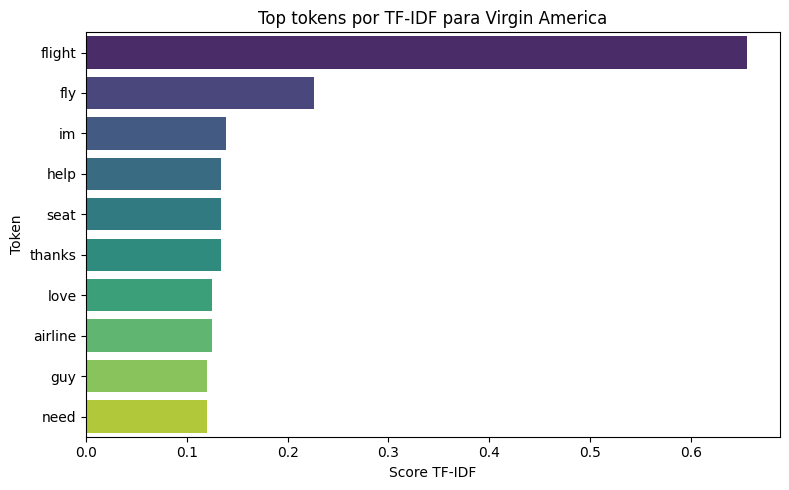

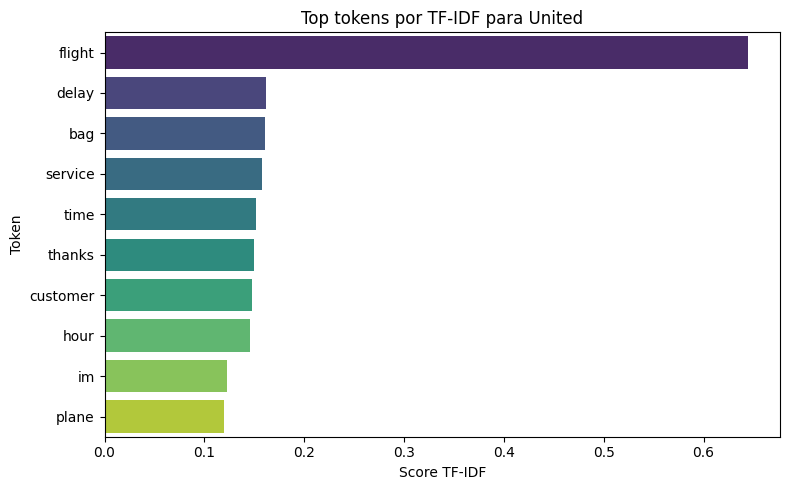

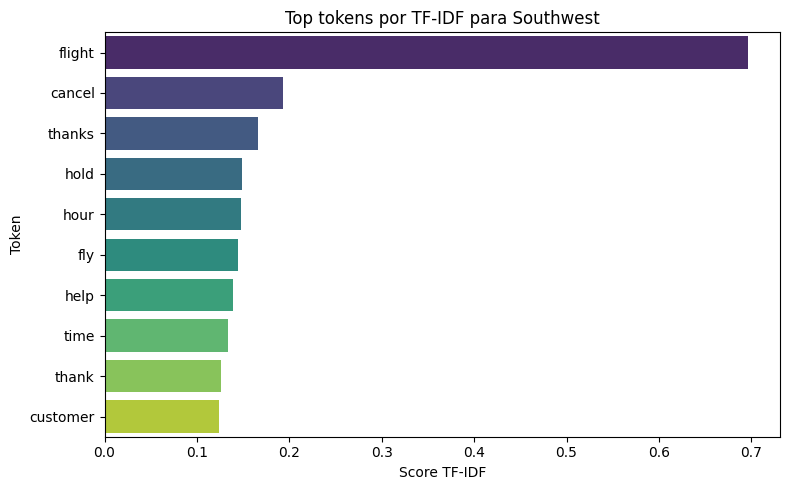

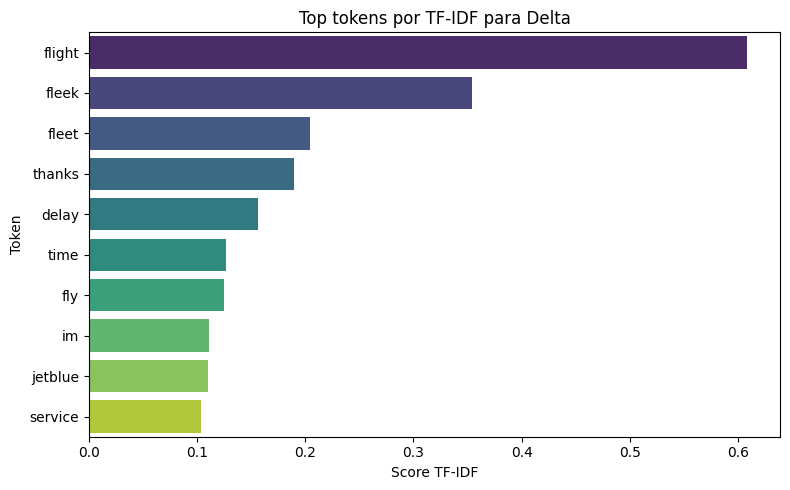

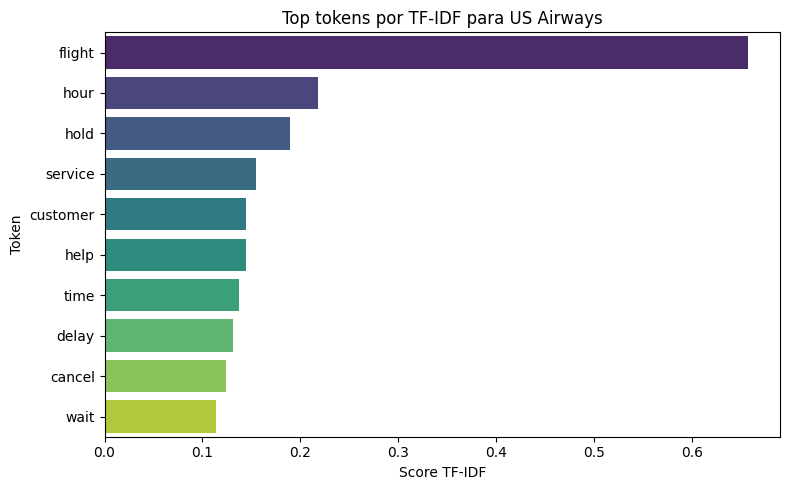

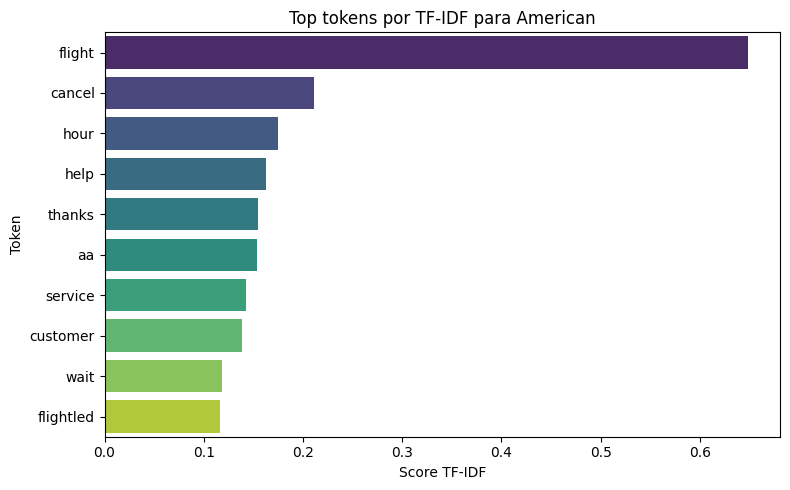

In [121]:
for airline in airlines:
  plot_top_terms_airline(airline)

#### Subplot

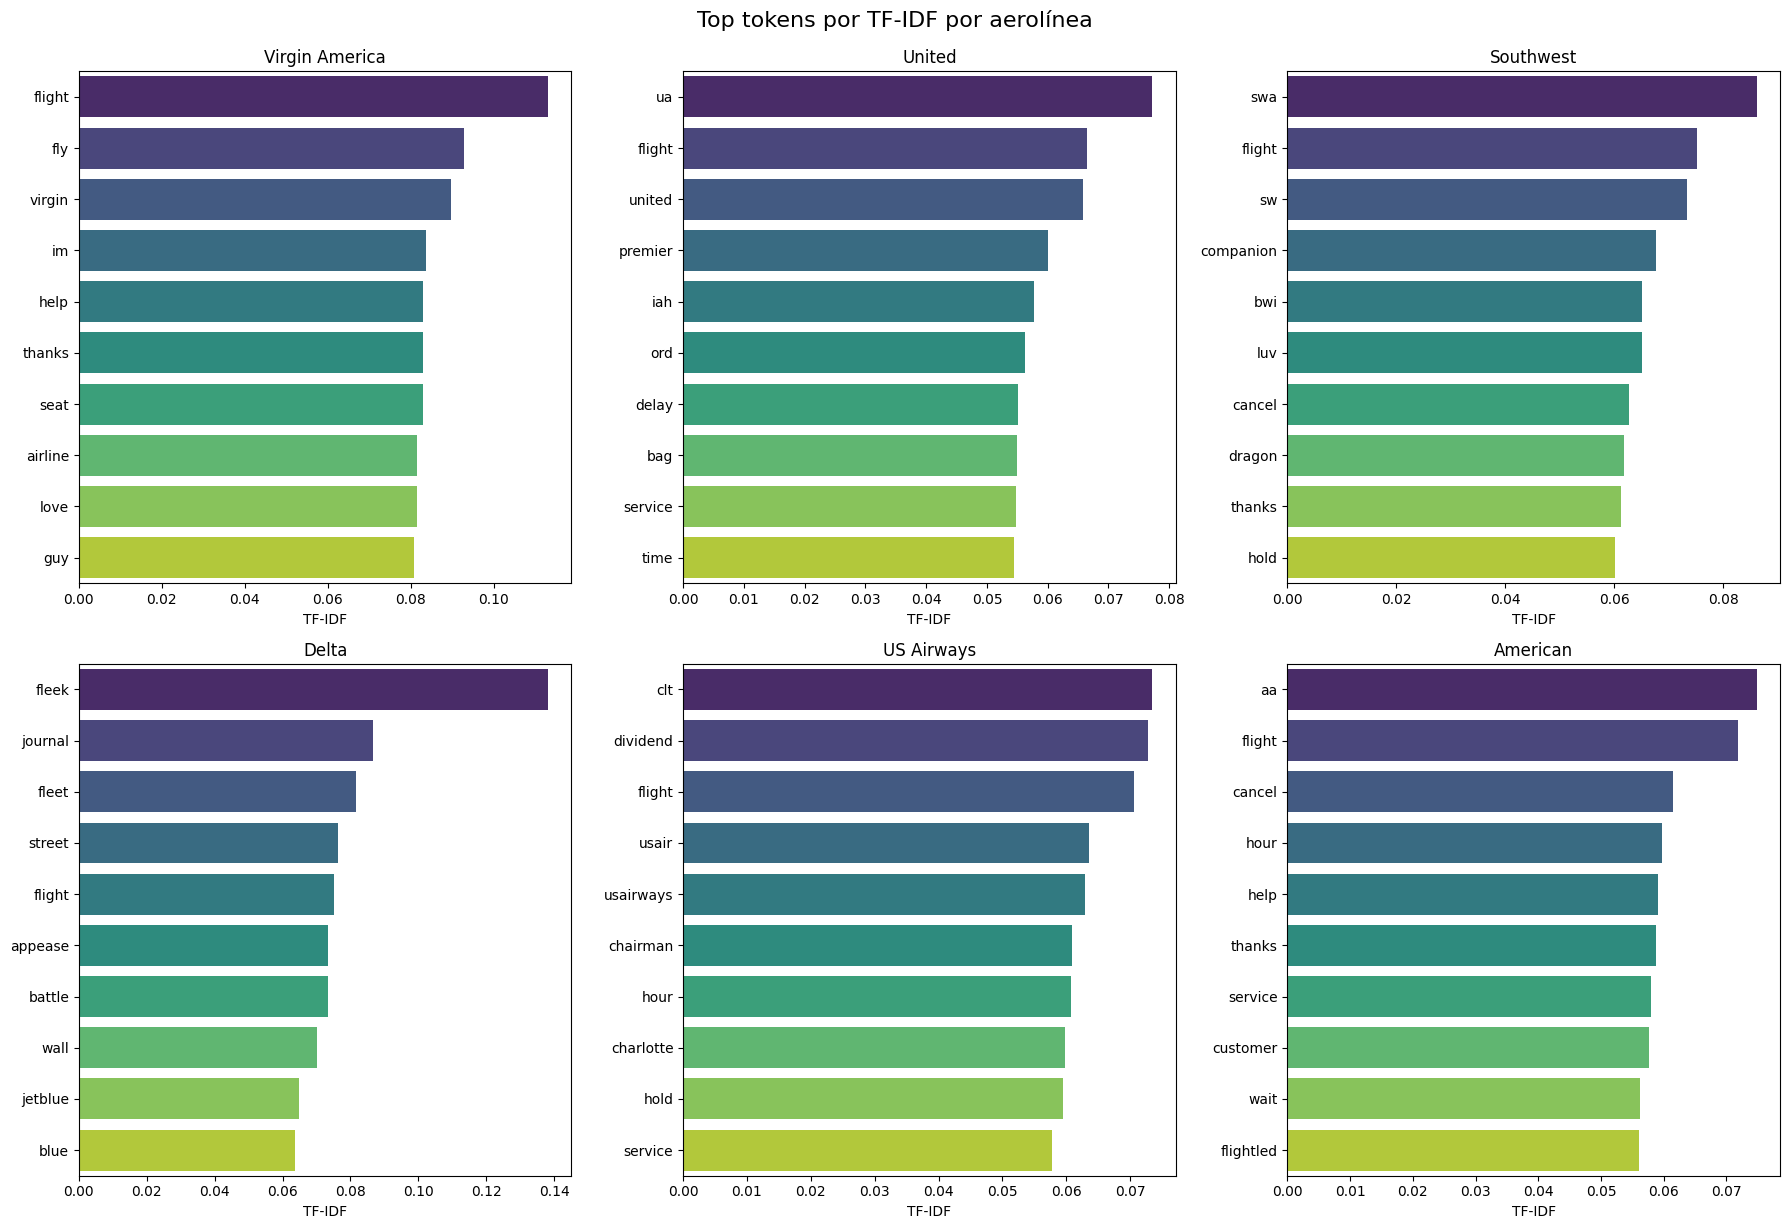

In [193]:
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, airline in enumerate(airlines):
    data = top_airline_terms_df[top_airline_terms_df['airline'] == airline]

    sns.barplot(ax=axes[i], data=data, x='tfidf', y='token', palette='viridis', hue='token', legend=False)
    axes[i].set_title(airline)
    axes[i].set_xlabel('TF-IDF')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Top tokens por TF-IDF por aerolínea", fontsize=16, y=1.02)
plt.show()


####En el análisis TF-IDF por aerolínea, después de haber aplicado suavizado y normalización, el término flight sigue presente en muchas aerolíneas, aunque con menor prominencia, además los términos siguen siendo homogeneos pero con algunas diferencias

####Esto indica que, aunque se reduce su dominancia artificial, los usuarios tienden a expresar quejas con un vocabulario muy similar entre aerolíneas, centrado en temas recurrentes como retrasos, cancelaciones o mal servicio.

####La falta de términos distintivos por aerolínea sugiere que el texto por sí solo no es útil para diferenciar la compañía aérea, reforzando que el modelo debe enfocarse en predecir el motivo de queja, mientras que la aerolínea debe ser usada como atributo ya conocido.

Para validar estas observaciones, mediremos cuantos tokens comparten las clases a través del cálculo de la simiilitud entre los vectores TD-IDF de cada clase con cosine similarity

## 4. Análisis de similitud léxica

In [91]:
from sklearn.metrics.pairwise import cosine_similarity


### Similitud léxica por categoría de queja

In [189]:
#Cosine similarity
cosine_sim = cosine_similarity(tfidf_by_reason)

cosine_df = pd.DataFrame(cosine_sim, index=grouped_by_reason['negativereason'], columns=grouped_by_reason['negativereason'])

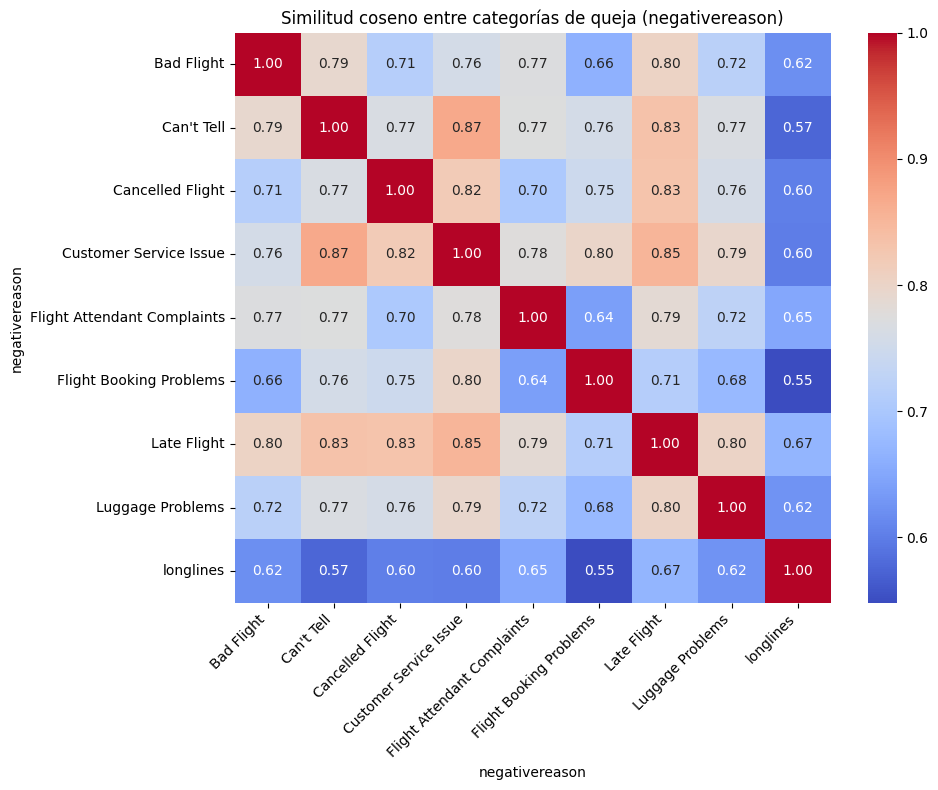

In [190]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Similitud coseno entre categorías de queja (negativereason)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Se calculó la similitud coseno entre categorías de queja (negativereason) utilizando representaciones TF-IDF con suavizado logarítmico (sublinear_tf=True) y normalización L2. Esta configuración reduce la influencia de términos frecuentes y ajusta las diferencias de longitud entre clases, permitiendo una comparación más justa entre vectores léxicos.

El heatmap resultante revela que existen grupos de categorías con similitud moderada-alta, como Late Flight, Cancelled Flight y Bad Flight, lo que indica que comparten un vocabulario muy similar. Otras clases, como Damaged Luggage, Longlines y Lost Luggage, presentan menor similitud con el resto, lo que sugiere que son léxicamente más diferenciables.

Estos hallazgos anticipan posibles zonas de confusión en un modelo supervisado, y refuerzan la necesidad de utilizar modelos con mayor capacidad contextual para capturar diferencias sutiles entre clases que comparten tokens frecuentes.

Tras calcular la similitud coseno entre las representaciones TF-IDF por categoría de queja (negativereason), se observó que la clase Can't Tell presentaba una alta similitud léxica (> 0.76) con múltiples categorías distintas, como Late Flight, Customer Service Issue y Cancelled Flight.

Esta dispersión semántica se confirmó al analizar los top tokens por TF-IDF, donde predominan términos poco representativos como flight, airline, rt, fleek, profit o wifi, lo que sugiere que la clase actúa como un contenedor ambiguo de quejas indefinidas o clasificadas incorrectamente.

Considerando que su propia definición implica incertidumbre en la intención del usuario, y que el modelo base mostró bajo desempeño en esta clase, se decidió eliminar Can't Tell del conjunto de clases antes del entrenamiento. Esta decisión mejora la consistencia semántica y reduce la confusión entre clases durante el modelado supervisado

### Similitud léxica por categoría de queja sin "Can't Tell"

In [202]:
print("Cantidad de tuits con categoría 'Can't Tell':", new_data['negativereason'].eq("Can't Tell").sum())

Cantidad de tuits con categoría 'Can't Tell': 1190


In [203]:
new_data = new_data[new_data['negativereason'] != "Can't Tell"]

In [205]:
print("Clases únicas restantes:", new_data[new_data['airline_sentiment']=='negative']['negativereason'].unique())

Clases únicas restantes: ['Bad Flight' 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Luggage Problems'
 'Flight Attendant Complaints' 'Cancelled Flight' 'longlines']


In [206]:
df_reason = new_data[new_data['negativereason'].notna()]

In [207]:
grouped_by_reason = df_reason.groupby('negativereason')['clean_text'].apply(lambda x: ' '.join(x)).reset_index()

In [208]:
# TF-IDF
vectorizer_reason = TfidfVectorizer(stop_words='english', max_features=1000, sublinear_tf=True, norm='l2')
matrix_reason = vectorizer_reason.fit_transform(grouped_by_reason['clean_text'])

tfidf_by_reason = pd.DataFrame(matrix_reason.toarray(), index=grouped_by_reason['negativereason'], columns=vectorizer_reason.get_feature_names_out())

# Top 10 tokens
top_terms_by_reason = {}
for reason in tfidf_by_reason.index:
    top_terms = tfidf_by_reason.loc[reason].sort_values(ascending=False).head(10)
    top_terms_by_reason[reason] = top_terms

top_terms_df = pd.DataFrame([
    {'negativereason': reason, 'token': token, 'tfidf': score}
    for reason, tokens in top_terms_by_reason.items()
    for token, score in tokens.items()
])


In [209]:
#Cosine similarity
cosine_sim = cosine_similarity(tfidf_by_reason)

cosine_df = pd.DataFrame(cosine_sim, index=grouped_by_reason['negativereason'], columns=grouped_by_reason['negativereason'])

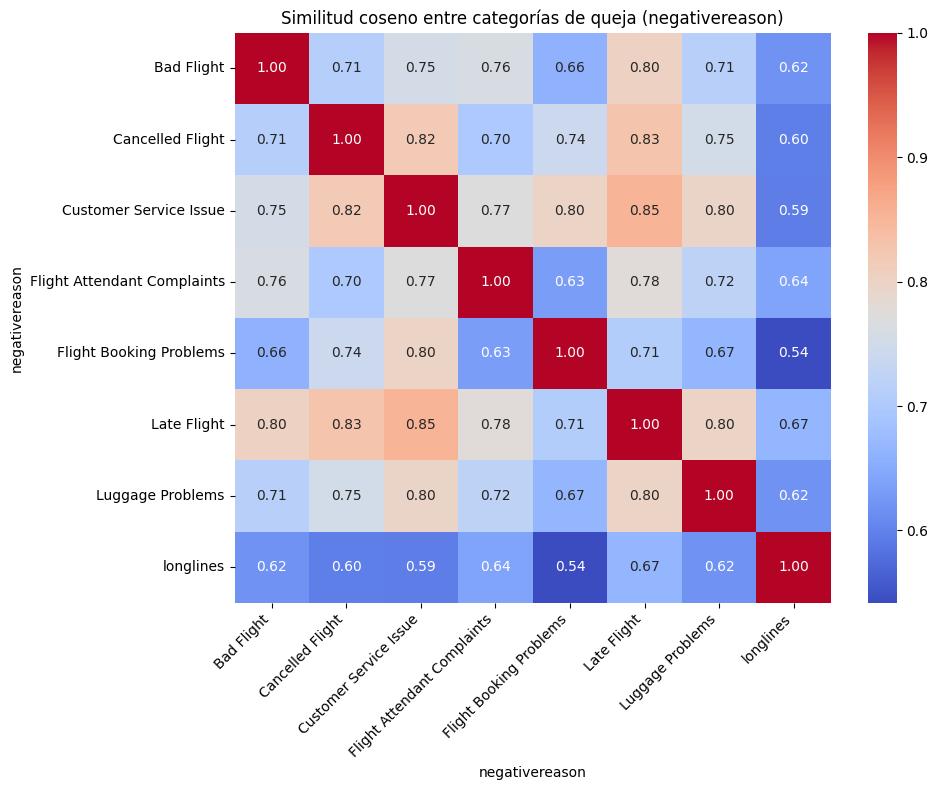

In [210]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Similitud coseno entre categorías de queja (negativereason)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Similitud léxica por aerolínea

In [191]:
# Cosine similarity airlines
cosine_sim_airline = cosine_similarity(tfidf_by_airline)

airline_cosine_df = pd.DataFrame(cosine_sim_airline, index=grouped_by_airline['airline'], columns=grouped_by_airline['airline'])

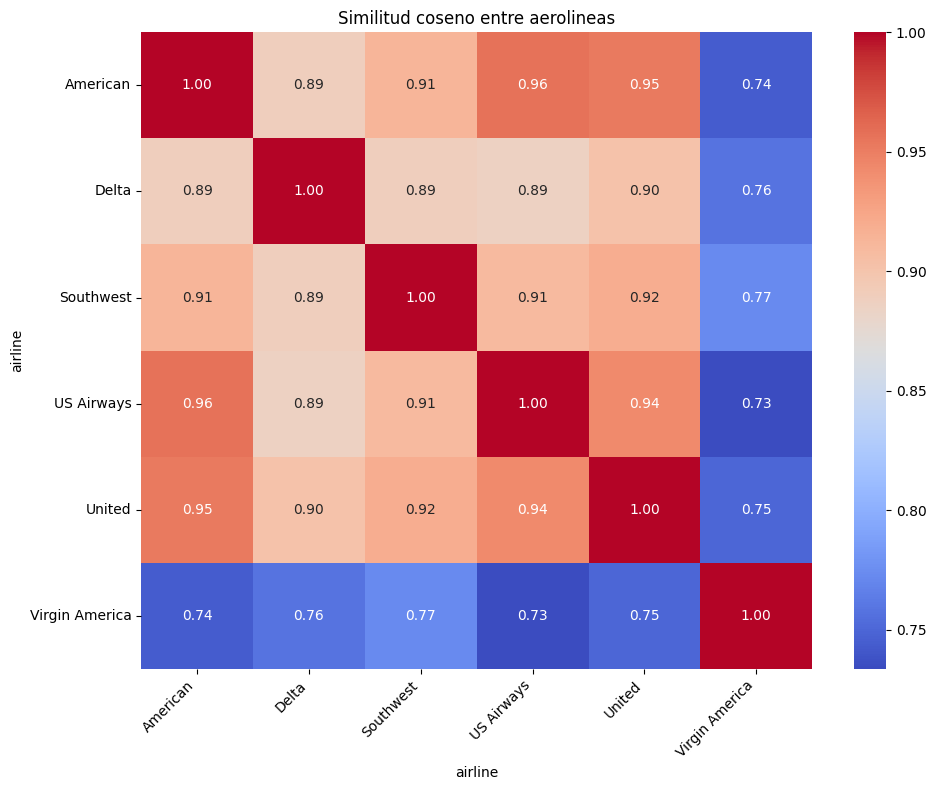

In [192]:
plt.figure(figsize=(10,8))
sns.heatmap(airline_cosine_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Similitud coseno entre aerolineas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Tras calcular la similitud coseno entre las representaciones TF-IDF de las distintas aerolíneas, se observa que todas las clases presentan una alta similitud léxica, con valores que superan consistentemente el 0.90.

Esto índica que el vocabulario utilizado por los usuarios respectos a las diferentes aerolíneas es altamente homogéneo, esto sugiere que un modelo de clasificación basado únicamente en el contenido textual tendría dificultades para distinguir entre aerolíneas.


### Similitud léxica por aerolinea y categoría de queja

In [211]:
df_combination = new_data[new_data['negativereason'].notna() & new_data['airline'].notna()]

In [212]:
df_combination['airline_reason'] = df_combination['airline'] + ' | ' + df_combination['negativereason']

<ipython-input-212-540e57319b09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combination['airline_reason'] = df_combination['airline'] + ' | ' + df_combination['negativereason']


In [213]:
grouped_by_combo = df_combination.groupby('airline_reason')['clean_text'].apply(lambda x: ' '.join(x)).reset_index()

In [214]:
vectorizer_combo = TfidfVectorizer(stop_words='english', max_features=1000, sublinear_tf=True, norm='l2')
matrix_combo = vectorizer_combo.fit_transform(grouped_by_combo['clean_text'])

tfidf_by_combo = pd.DataFrame(matrix_combo.toarray(), index=grouped_by_combo['airline_reason'], columns=vectorizer_combo.get_feature_names_out())

In [215]:
from itertools import combinations

intra_reason_pairs = []

for reason in negative_reasons:
    # Filtrar filas de TF-IDF que contengan la categoría de queja
    mask = tfidf_by_combo.index.str.contains(f"\\| {reason}$")
    sub_df = tfidf_by_combo[mask]

    # Si hay al menos 2 combinaciones para comparar
    if len(sub_df) >= 2:
        for row1, row2 in combinations(sub_df.index, 2):
            sim = cosine_similarity(
                [sub_df.loc[row1]], [sub_df.loc[row2]]
            )[0][0]
            intra_reason_pairs.append((row1, row2, reason, sim))

intra_reason_df = pd.DataFrame(intra_reason_pairs, columns=['combo_1', 'combo_2', 'negativereason', 'similarity'])

umbral = 0.7
divergent_cases = intra_reason_df[intra_reason_df['similarity'] < umbral].sort_values(by='similarity')

print(f"Comparaciones entre aerolíneas con misma categoría de queja con similitud < {umbral}:\n")
print(divergent_cases.to_string(index=False))

Comparaciones entre aerolíneas con misma categoría de queja con similitud < 0.7:

                                 combo_1                                      combo_2              negativereason  similarity
                       Delta | longlines                   Virgin America | longlines                   longlines    0.049898
  American | Flight Attendant Complaints Virgin America | Flight Attendant Complaints Flight Attendant Complaints    0.089452
     Delta | Flight Attendant Complaints Virgin America | Flight Attendant Complaints Flight Attendant Complaints    0.129276
US Airways | Flight Attendant Complaints Virgin America | Flight Attendant Complaints Flight Attendant Complaints    0.130070
                  US Airways | longlines                   Virgin America | longlines                   longlines    0.133007
 Southwest | Flight Attendant Complaints Virgin America | Flight Attendant Complaints Flight Attendant Complaints    0.134610
                      United | longl

In [200]:
print(len(divergent_cases))

129


A pesar de aplicar suavizado y normalización sobre las representaciones TF-IDF, se observa que varias combinaciones asociadas a Virgin America presentan una similitud coseno baja con el resto de aerolíneas, incluso dentro de la misma categoría de queja.
Este comportamiento puede atribuirse a la baja cantidad de tuits disponibles para Virgin America (~500), en comparación con otras aerolíneas que superan los 2500.

Un menor volumen implica menor diversidad léxica, lo cual afecta negativamente la representatividad del vector TF-IDF.

Este hallazgo sugiere que combinaciones con bajo volumen podrían necesitar estrategias específicas de tratamiento, como aumento de datos, agrupamiento, o suavizado adaptativo, especialmente si se utilizan como insumos para sistemas de recomendación o clasificación.


In [230]:
new_data.to_csv('tweets_cleaned.csv', index=False)

# TEST MODELOS (TP)

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
new_data_adjusted = new_data.copy()

Reporte de clasificación:
                             precision    recall  f1-score   support

                 Bad Flight       0.61      0.34      0.44       116
           Cancelled Flight       0.83      0.64      0.72       169
     Customer Service Issue       0.64      0.85      0.73       582
Flight Attendant Complaints       0.51      0.21      0.30        96
    Flight Booking Problems       0.55      0.30      0.39       106
                Late Flight       0.65      0.75      0.70       333
           Luggage Problems       0.75      0.71      0.73       160
                  longlines       0.25      0.03      0.05        36

                   accuracy                           0.66      1598
                  macro avg       0.60      0.48      0.51      1598
               weighted avg       0.65      0.66      0.64      1598



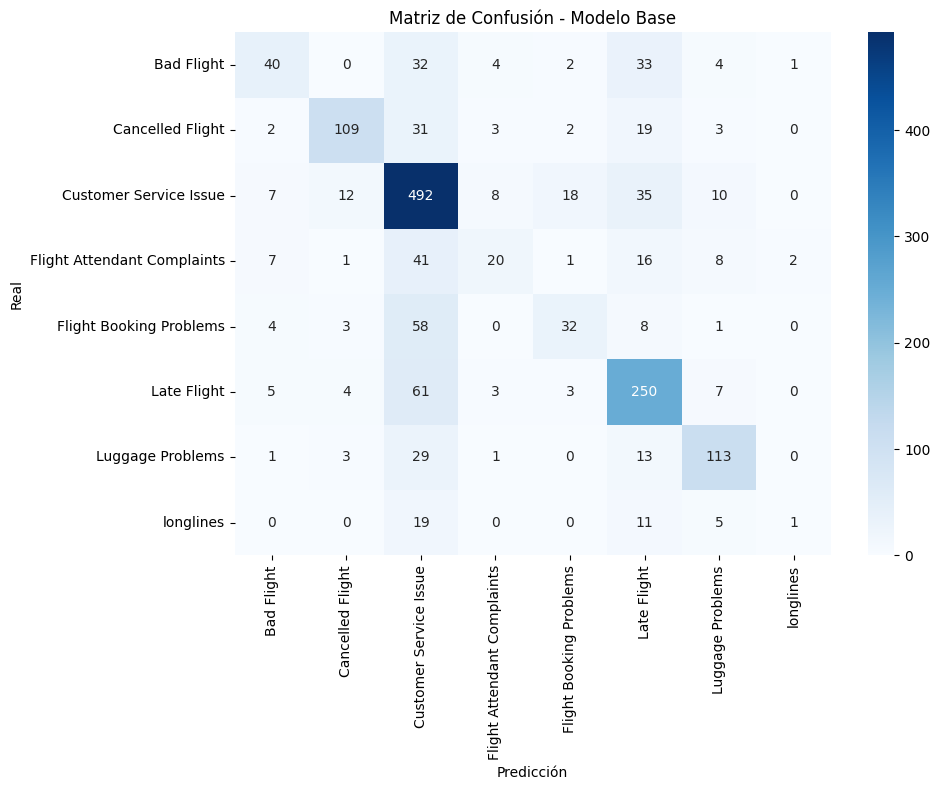

In [225]:
# Filtrar tuits negativos con negativereason válido
df = new_data_adjusted[(new_data_adjusted['airline_sentiment'] == 'negative') & (new_data_adjusted['negativereason'].notna())].copy()

# # Preprocesamiento simple
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['negativereason']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenamiento
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)

# Reporte
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
conf_df = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10,8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Modelo Base")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Reporte de clasificación - MultinomialNB:
                             precision    recall  f1-score   support

                 Bad Flight       0.68      0.15      0.24       116
           Cancelled Flight       0.83      0.43      0.57       169
     Customer Service Issue       0.57      0.90      0.70       582
Flight Attendant Complaints       0.62      0.08      0.15        96
    Flight Booking Problems       0.41      0.08      0.14       106
                Late Flight       0.57      0.77      0.66       333
           Luggage Problems       0.82      0.47      0.60       160
                  longlines       0.00      0.00      0.00        36

                   accuracy                           0.60      1598
                  macro avg       0.56      0.36      0.38      1598
               weighted avg       0.61      0.60      0.55      1598



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


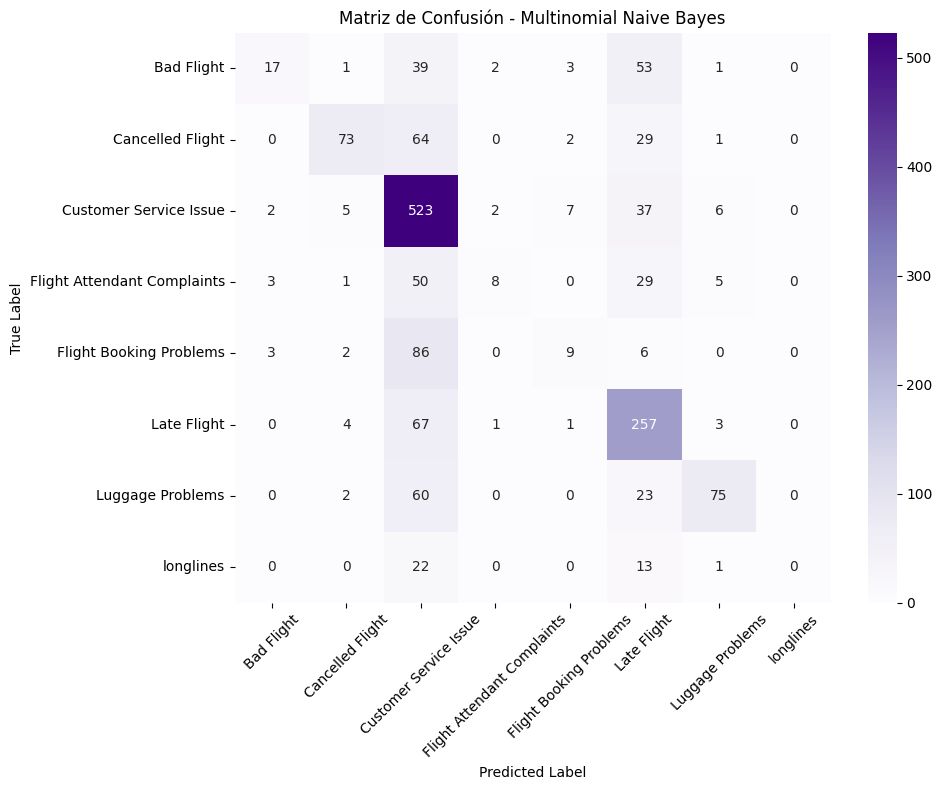

In [223]:
from sklearn.naive_bayes import MultinomialNB
# Entrenar modelo
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicción
y_pred_nb = nb_model.predict(X_test)

# Reporte de métricas
print("Reporte de clasificación - MultinomialNB:")
print(classification_report(y_test, y_pred_nb))

# Matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
conf_df_nb = pd.DataFrame(conf_matrix_nb, index=nb_model.classes_, columns=nb_model.classes_)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_df_nb, annot=True, fmt="d", cmap='Purples')
plt.title("Matriz de Confusión - Multinomial Naive Bayes")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
